In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import StandardScaler
%matplotlib notebook

#os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
os.chdir('C:\\Users\\Daniel\\Python and R Notebooks\\CAP2020\\CAP2020')

In [2]:
path = 'data\\processed\\df_quarter_de07_18.csv'
df = pd.read_csv(path)
df.rename(columns = {'Unnamed: 0':'Stock'}, inplace = True)
df.index = df['Stock']
df.drop('Stock', axis=1, inplace=True)
df=df.T
df.index.names=['date']
df.index = pd.to_datetime(df.index, errors = 'ignore')

In [3]:
df

Stock          AAN    AAPL     AAP      AA     ABC    ABMD     ABT     ACC  \
date                                                                         
2007-03-31  0.1864  0.0000  0.3615  0.4107  0.2929  0.0000  0.4568  1.4681   
2007-06-30  0.1882  0.0000  0.2890  0.3733  0.3247  0.0000  0.4308  1.4971   
2007-09-30  0.2274  0.0000  0.4072  0.3993  0.3959  0.0000  0.4150  1.5560   
2007-12-31  0.2760  0.0000  0.4933  0.3992  0.4333  0.0000  0.5337  1.2004   
2008-03-31  0.2633  0.0000  0.5826  0.4086  0.4151  0.0000  0.5030  1.2922   
2008-06-30  0.2996  0.0000  0.4355  0.4074  0.4520  0.0000  0.4462  1.5468   
2008-09-30  0.2074  0.0000  0.4449  0.5576  0.4382  0.0000  0.4377  1.4299   
2008-12-31  0.1508  0.0000  0.4233  0.7285  0.4365  0.0000  0.4985  1.4749   
2009-03-31  0.0985  0.0000  0.2365  0.7355  0.4203  0.0000  0.6507  1.4679   
2009-06-30  0.0970  0.0000  0.2208  0.7355  0.4275  0.0000  0.5720  1.1484   
2009-09-30  0.0642  0.0000  0.2152  0.6880  0.4333  0.0000  0.5426  1.3593   
2009-12-31  0.0620  0.0000  0.1582  0.7258  0.5018  0.0000  0.4929  1.3609   
2010-03-31  0.0612  0.0000  0.2503  0.7075  0.4797  0.0000  0.5215  1.3303   
2010-06-30  0.0574  0.0000  0.2825  0.6596  0.4639  0.0000  0.6334  1.3463   
2010-09-30  0.0435  0.0000  0.2636  0.6760  0.4546  0.0000  0.6032  0.9014   
2010-12-31  0.0427  0.0000  0.2895  0.6523  0.4346  0.0000  0.5594  0.9425   
2011-03-31  0.0408  0.0000  0.4874  0.5776  0.4285  0.0000  0.5087  0.9745   
2011-06-30  0.0411  0.0000  0.7398  0.5625  0.4252  0.0000  0.4787  0.9389   
2011-09-30  0.1639  0.0000  0.7709  0.5825  0.3393  0.0000  0.5323  0.9425   
2011-12-31  0.1575  0.0000  0.4896  0.6266  0.5102  0.0000  0.4926  1.0526   
2012-03-31  0.1458  0.0000  0.6129  0.6118  0.5057  0.0000  0.4660  1.0305   
2012-06-30  0.1423  0.0000  0.5662  0.6283  0.5064  0.0000  0.4902  1.1393   
2012-09-30  0.1296  0.0000  0.5225  0.6178  0.5889  0.0000  0.4462  0.8595   
2012-12-31  0.1246  0.0000  0.4993  0.6323  0.5973  0.0000  0.6768  0.8387   
2013-03-31  0.1190  0.0000  0.4756  0.5795  0.5951  0.0000  0.1535  0.8699   
2013-06-30  0.1163  0.1375  0.4413  0.6034  0.5775  0.0000  0.1527  0.9370   
2013-09-30  0.1138  0.1373  0.4115  0.5960  0.6021  0.0000  0.1436  0.9253   
2013-12-31  0.1252  0.1308  0.6943  0.7219  0.6214  0.0000  0.1346  1.0455   
2014-03-31  0.1205  0.1411  1.2011  0.6712  0.6511  0.0000  0.1448  1.0698   
2014-06-30  0.5154  0.2400  0.9908  0.6550  1.0046  0.0000  0.1442  1.1291   
2014-09-30  0.4639  0.2599  0.8985  0.7128  1.0198  0.0000  0.1625  1.1495   
2014-12-31  0.4954  0.2636  0.8170  0.7158  1.1287  0.0000  0.1583  1.1392   
2015-03-31  0.4084  0.3106  0.7499  0.7562  2.0574  0.0000  0.2711  0.9566   
2015-06-30  0.3757  0.3773  0.6348  0.7107  2.3754  0.0000  0.2548  0.9669   
2015-09-30  0.3679  0.4479  0.5359  0.7250  5.5137  0.0000  0.2820  1.0487   
2015-12-31  0.4467  0.4148  0.4930  0.7542  3.3794  0.0000  0.2768  1.0714   
2016-03-31  0.3654  0.5318  0.4678  0.6784  1.9937  0.0000  0.2884  0.7577   
2016-06-30  0.3381  0.5448  0.4255  0.6741  2.0188  0.0000  0.2910  0.7574   
2016-09-30  0.3405  0.5881  0.3651  0.8107  1.8175  0.0401  0.2876  0.7201   
2016-12-31  0.2371  0.5556  0.3576  1.5897  1.8292  0.0377  1.0070  0.6169   
2017-03-31  0.3231  0.6304  0.3550  1.4826  1.5181  0.0344  0.7577  0.6332   
2017-06-30  0.2601  0.6786  0.3336  1.1954  1.4810  0.0270  0.7534  0.6641   
2017-09-30  0.1741  0.7252  0.3231  1.1543  1.8317  0.0250  0.7277  0.7903   
2017-12-31  0.1572  0.7412  0.3058  1.4019  1.6062  0.0000  0.8807  0.8679   
2018-03-31  0.2041  0.7989  0.2946  1.2102  1.4213  0.0000  0.6737  0.9068   
2018-06-30  0.1564  0.8450  0.2857  1.2259  1.4183  0.0000  0.6483  0.7823   
2018-09-30  0.1686  0.8748  0.2857  1.1902  1.5380  0.0000  0.6280  0.8503   
2018-12-31  0.1937  0.7888  0.2945  1.0685  1.4177  0.0000  0.6345  0.8697   

Stock          ACE    ACIW  ...      WY     XEC     XEL    XLNX     XOM  \
date                    

### Dates

In [34]:
dates = df.index

### Sample/Test Plot

<IPython.core.display.Javascript object>


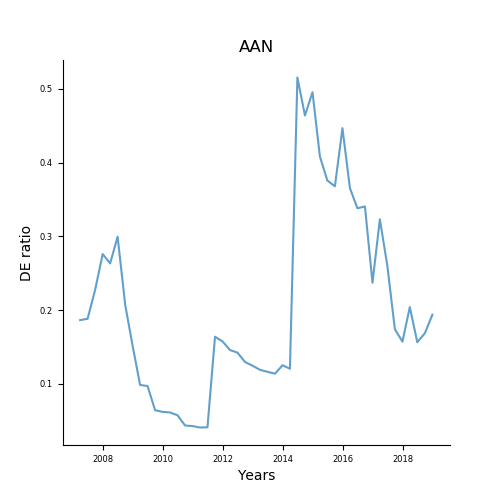

In [38]:
sub_title_font =8
legend_font =8
axis_font = 6
tick_rotation = 0
black_dot = 2
red_dot = 5

fig, ax = plt.subplots(1,1, figsize=(5,5))

### Company Timeseries            
wt = ax.plot(dates, df['AAN'].values, label='Quarterly DE ratio', alpha=0.7)

plt.xlabel('Years')
plt.ylabel('DE ratio')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('AAN')
ax.tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
ax.tick_params(axis="y", labelsize=axis_font)
plt.show()

## Grid Plot for each company (476 plots)

In [49]:
### matrix of subplots
n_stocks = len(df.columns)
n_cols = 4
n_rows = 4
n_plots = n_cols*n_rows
nloops = int(np.floor(n_stocks/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)









Batch 0


<IPython.core.display.Javascript object>


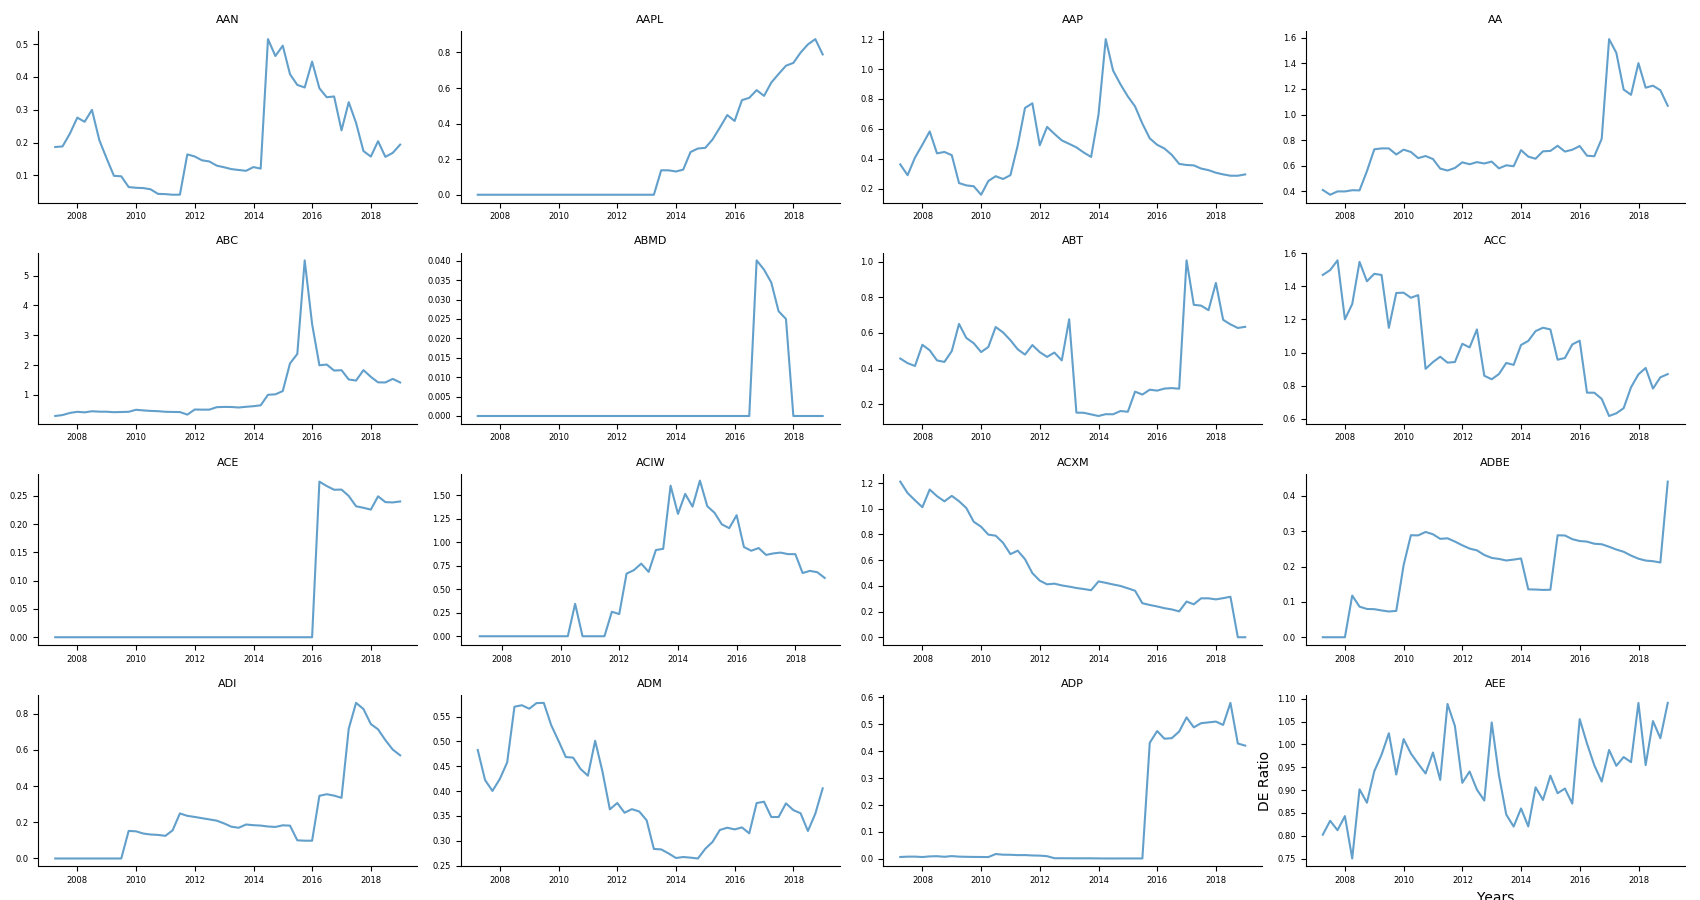









Batch 1


<IPython.core.display.Javascript object>


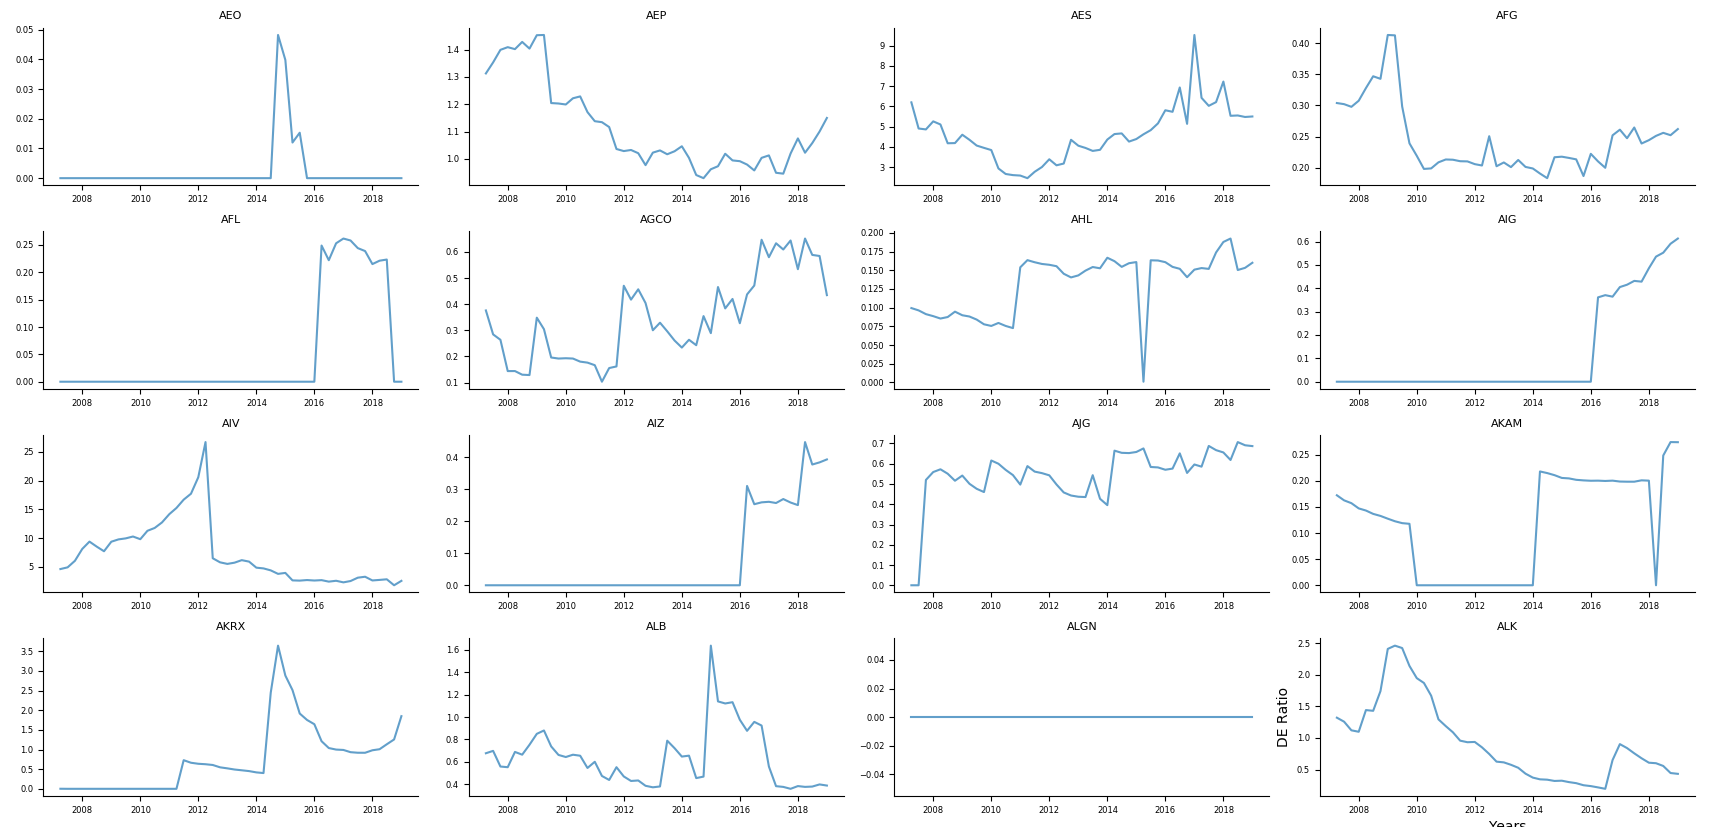









Batch 2


<IPython.core.display.Javascript object>


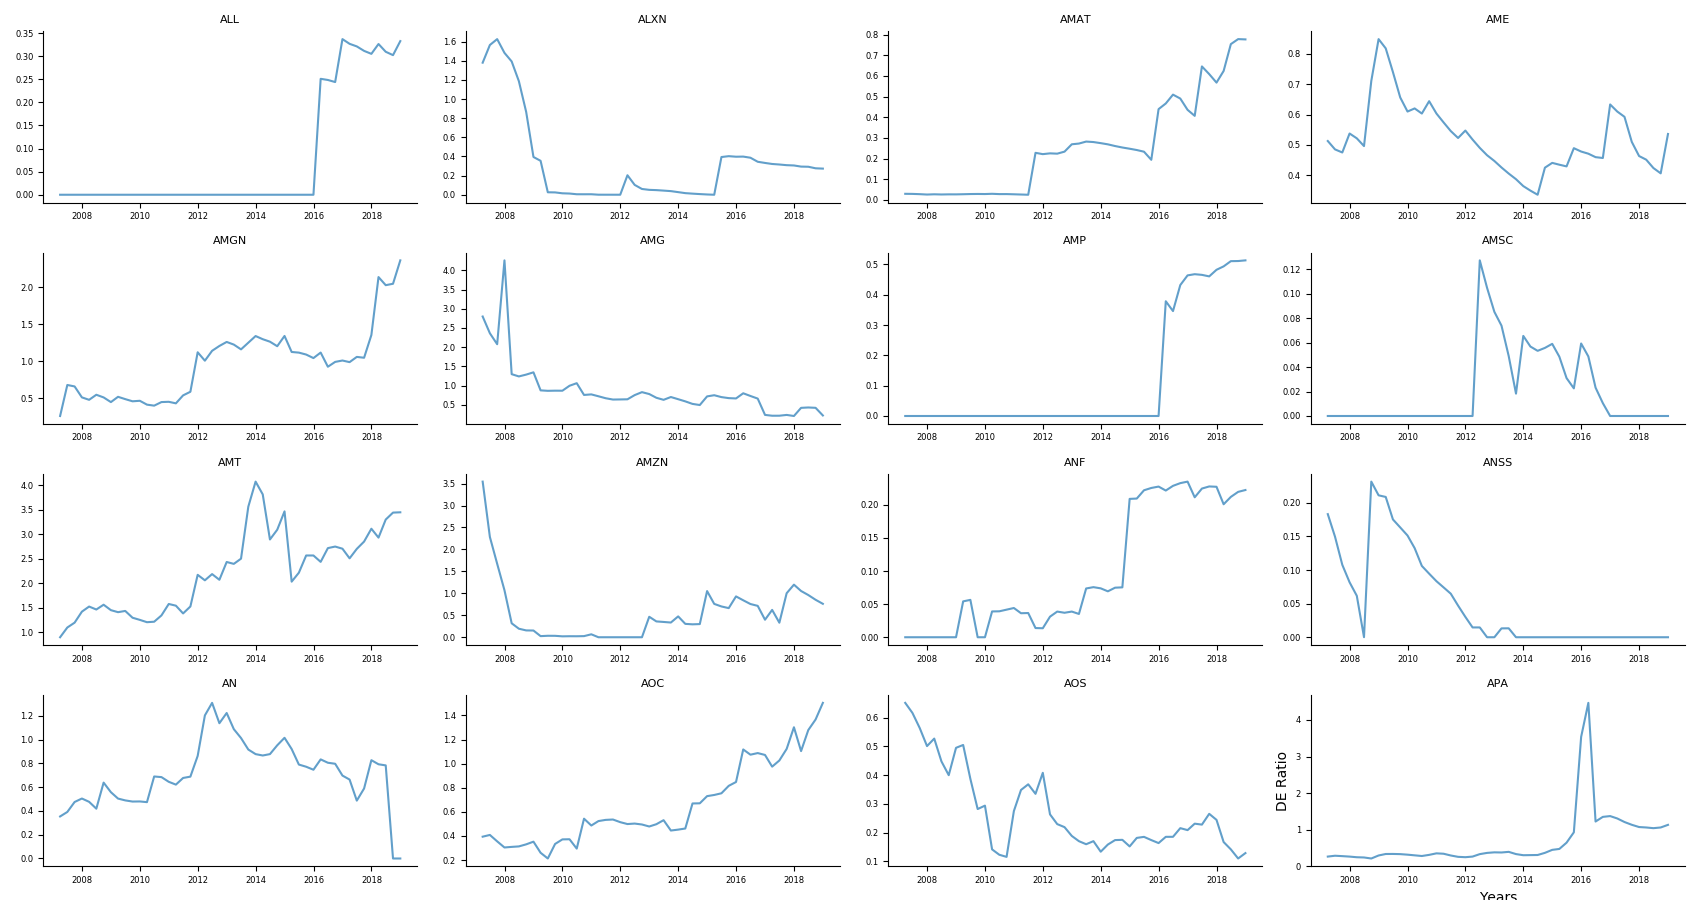









Batch 3


<IPython.core.display.Javascript object>


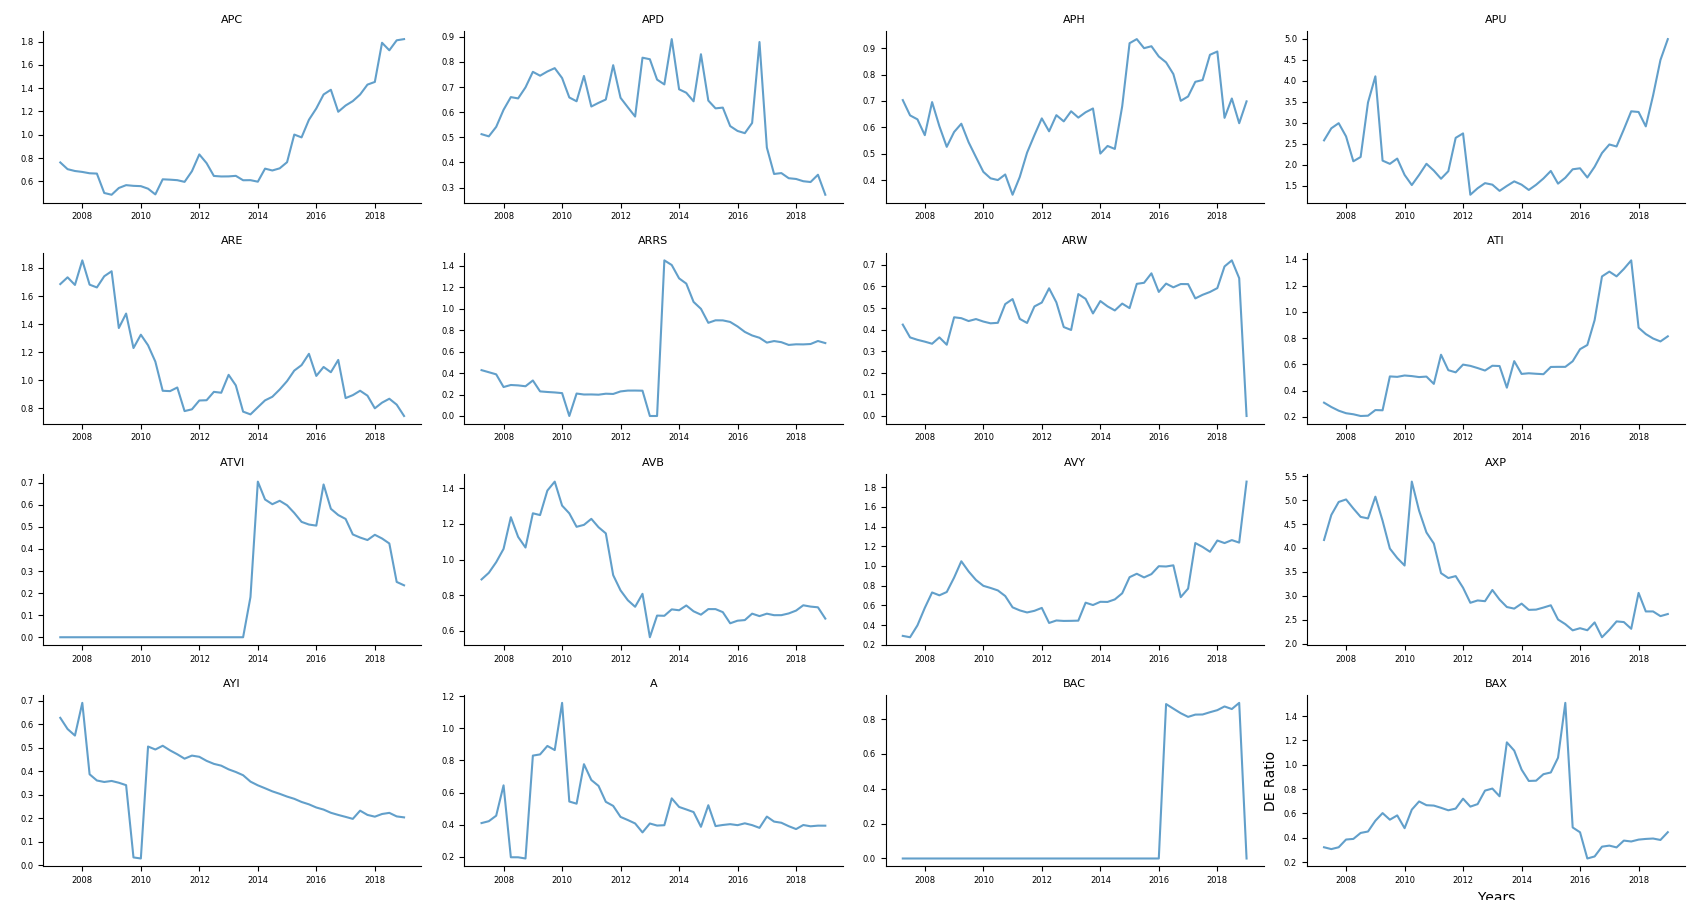









Batch 4


<IPython.core.display.Javascript object>


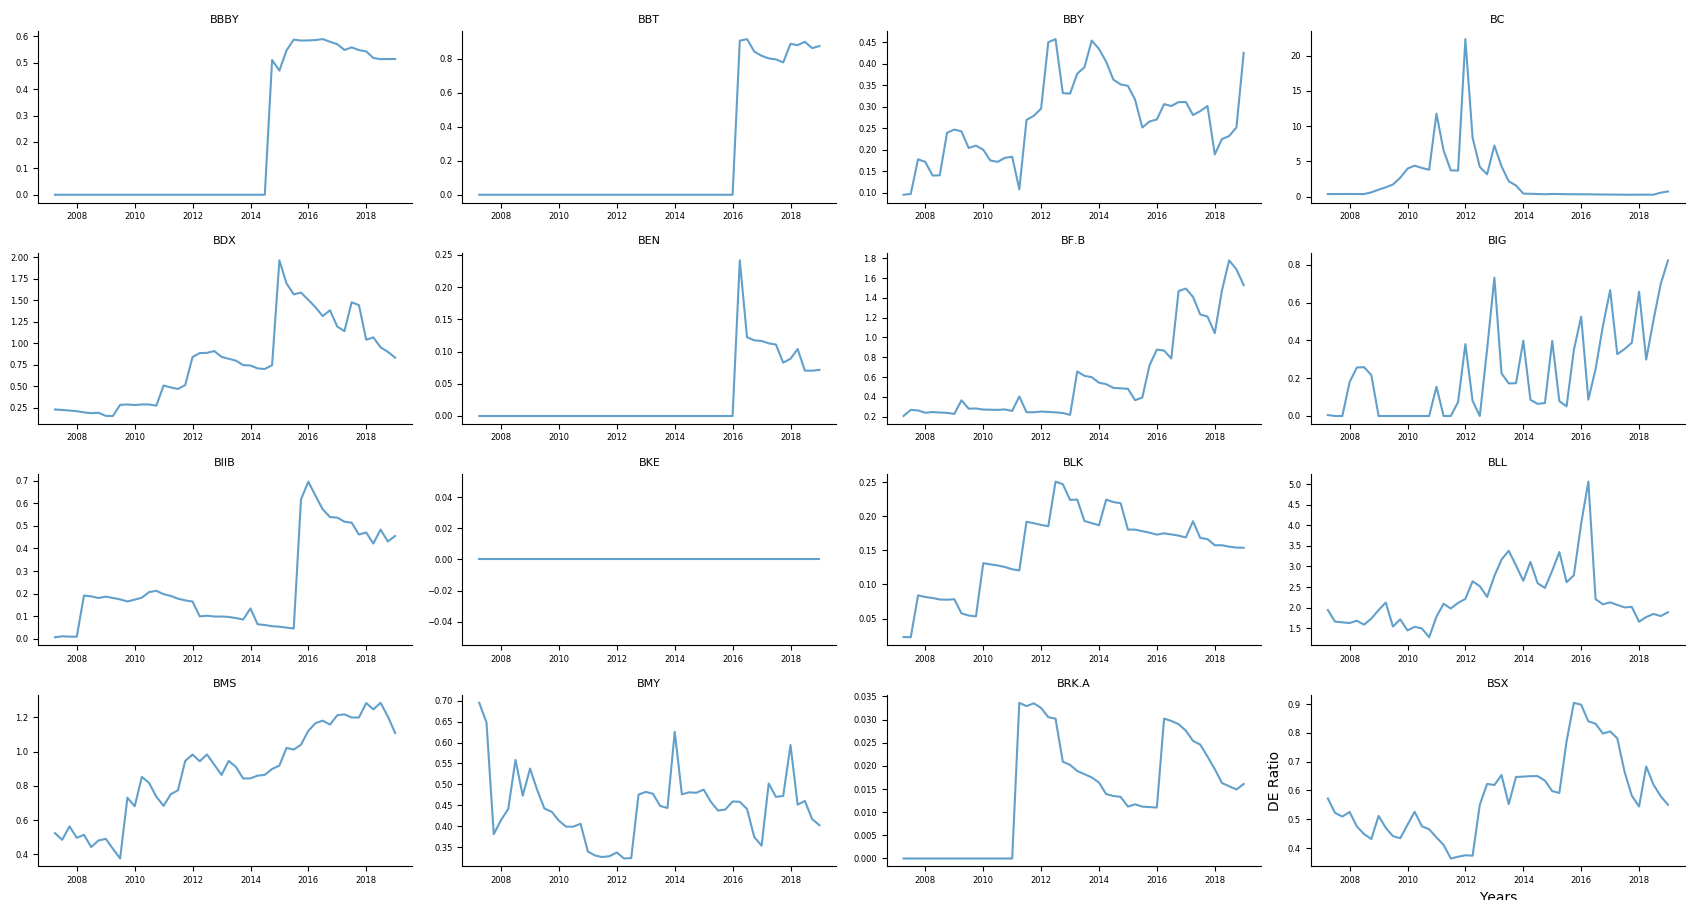









Batch 5


<IPython.core.display.Javascript object>


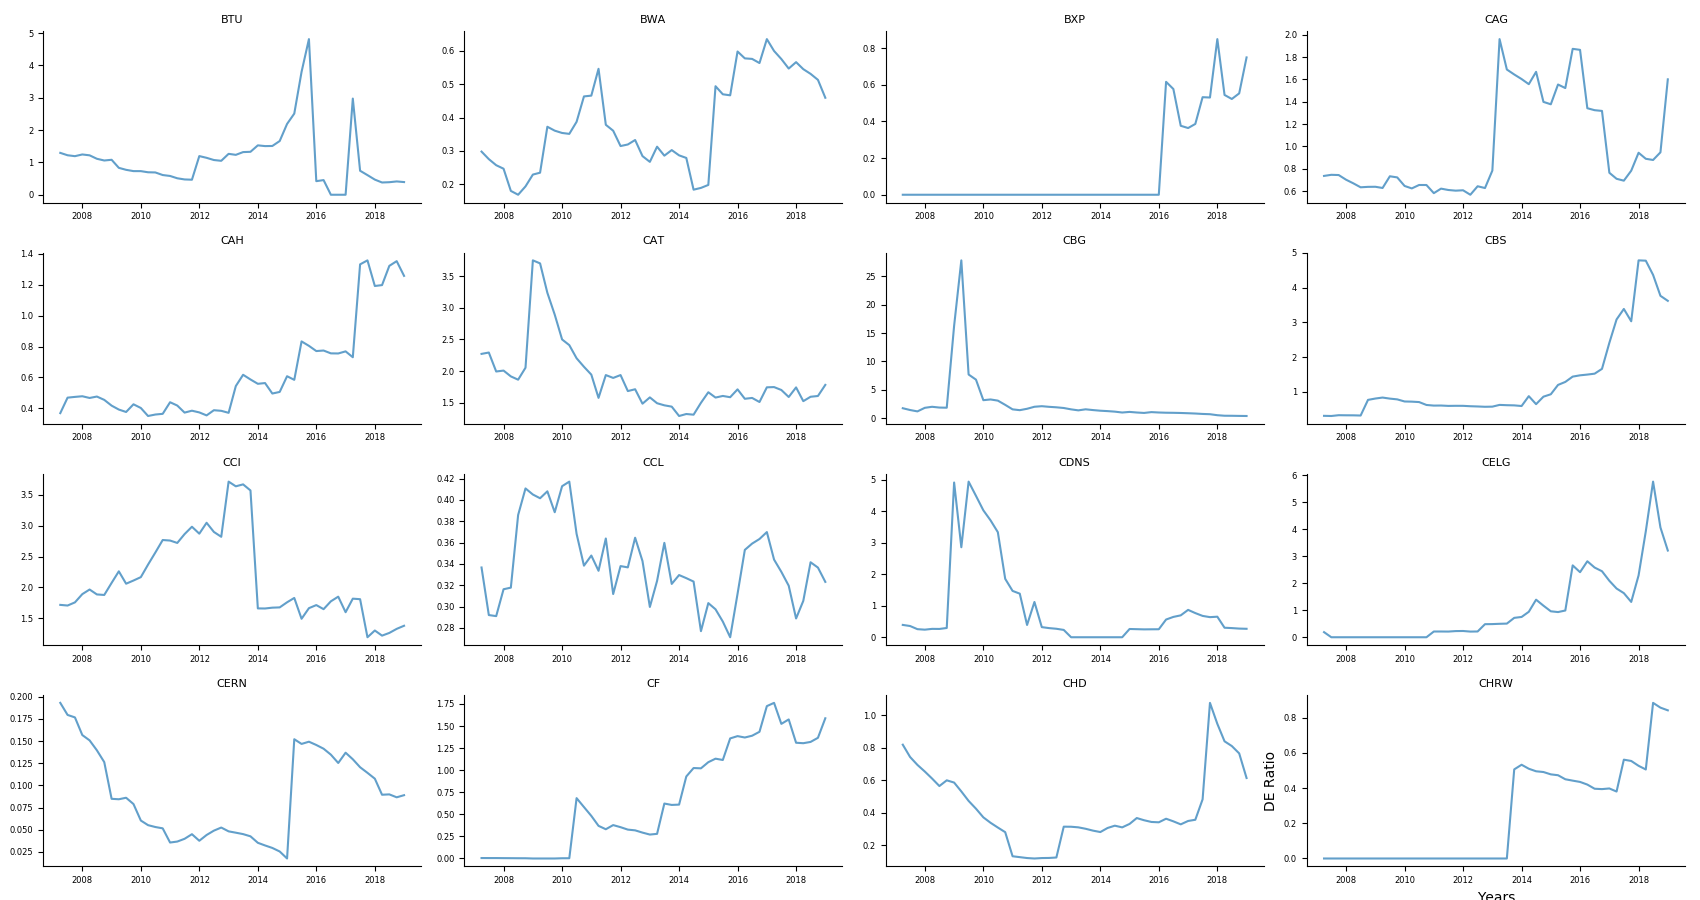









Batch 6


<IPython.core.display.Javascript object>


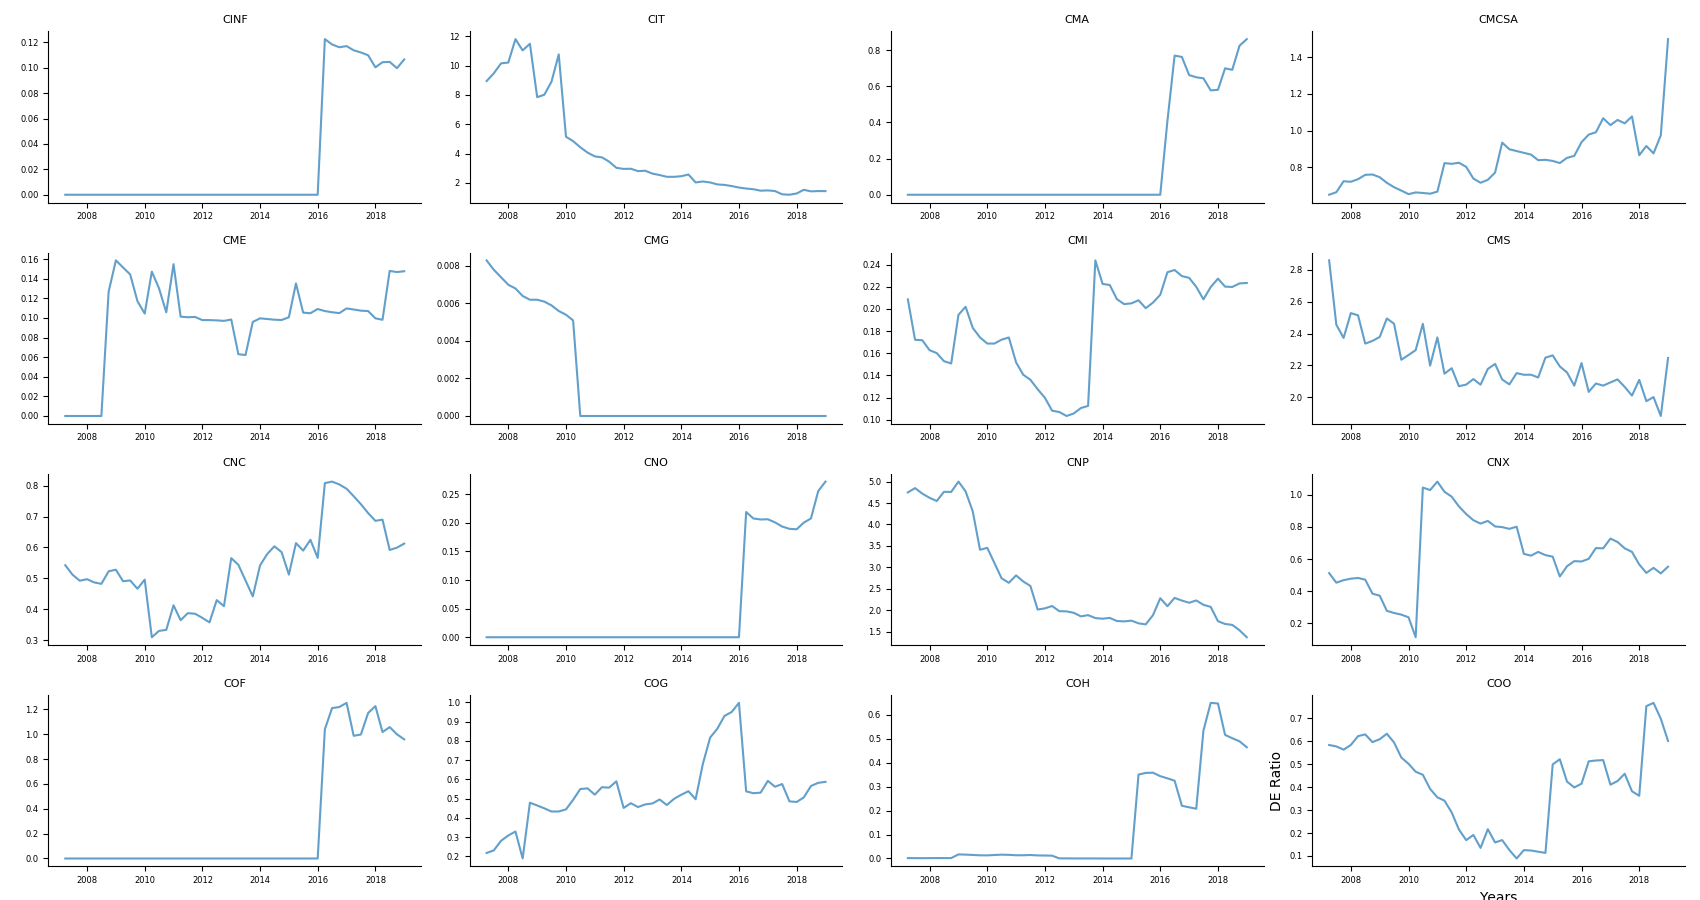









Batch 7


<IPython.core.display.Javascript object>


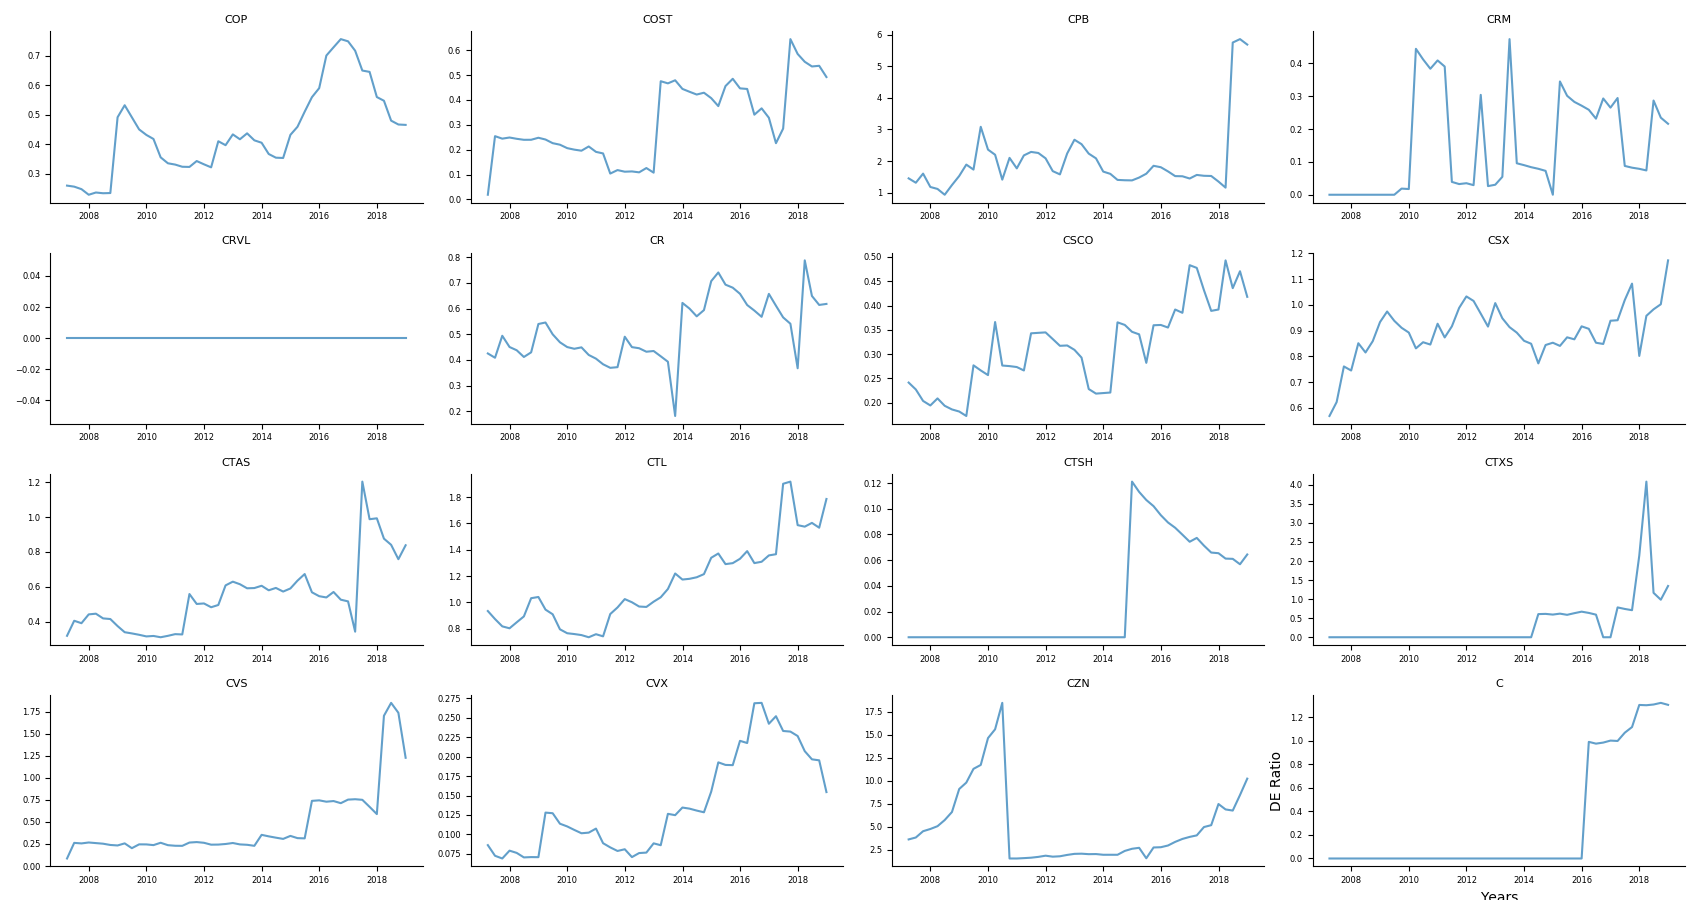









Batch 8


<IPython.core.display.Javascript object>


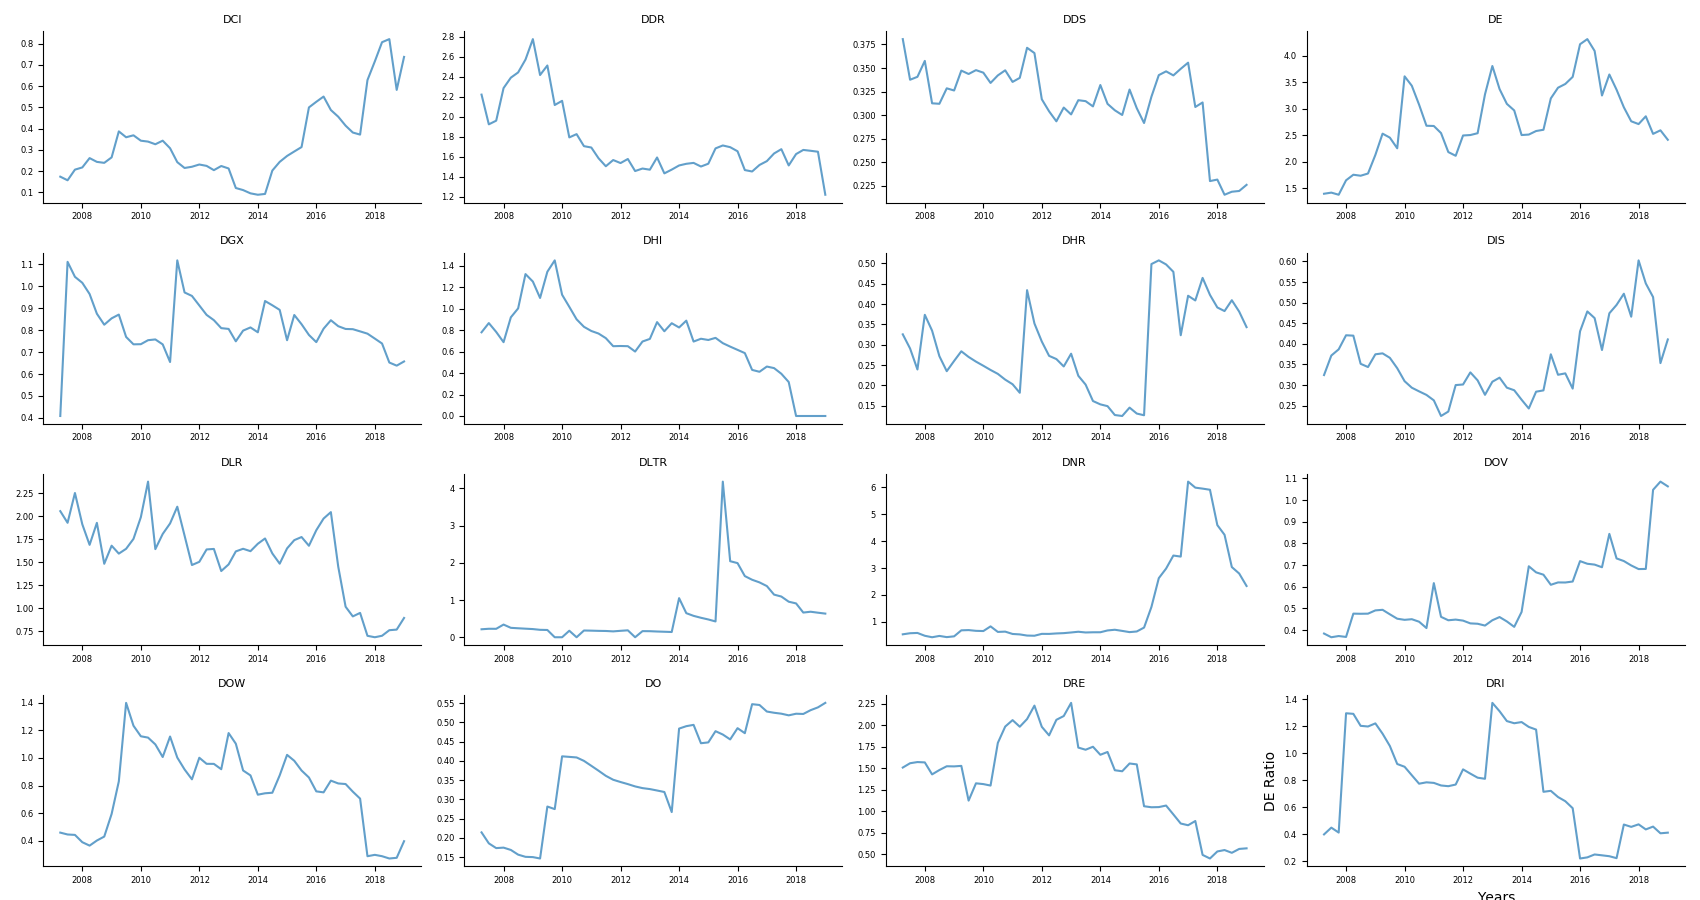









Batch 9


<IPython.core.display.Javascript object>


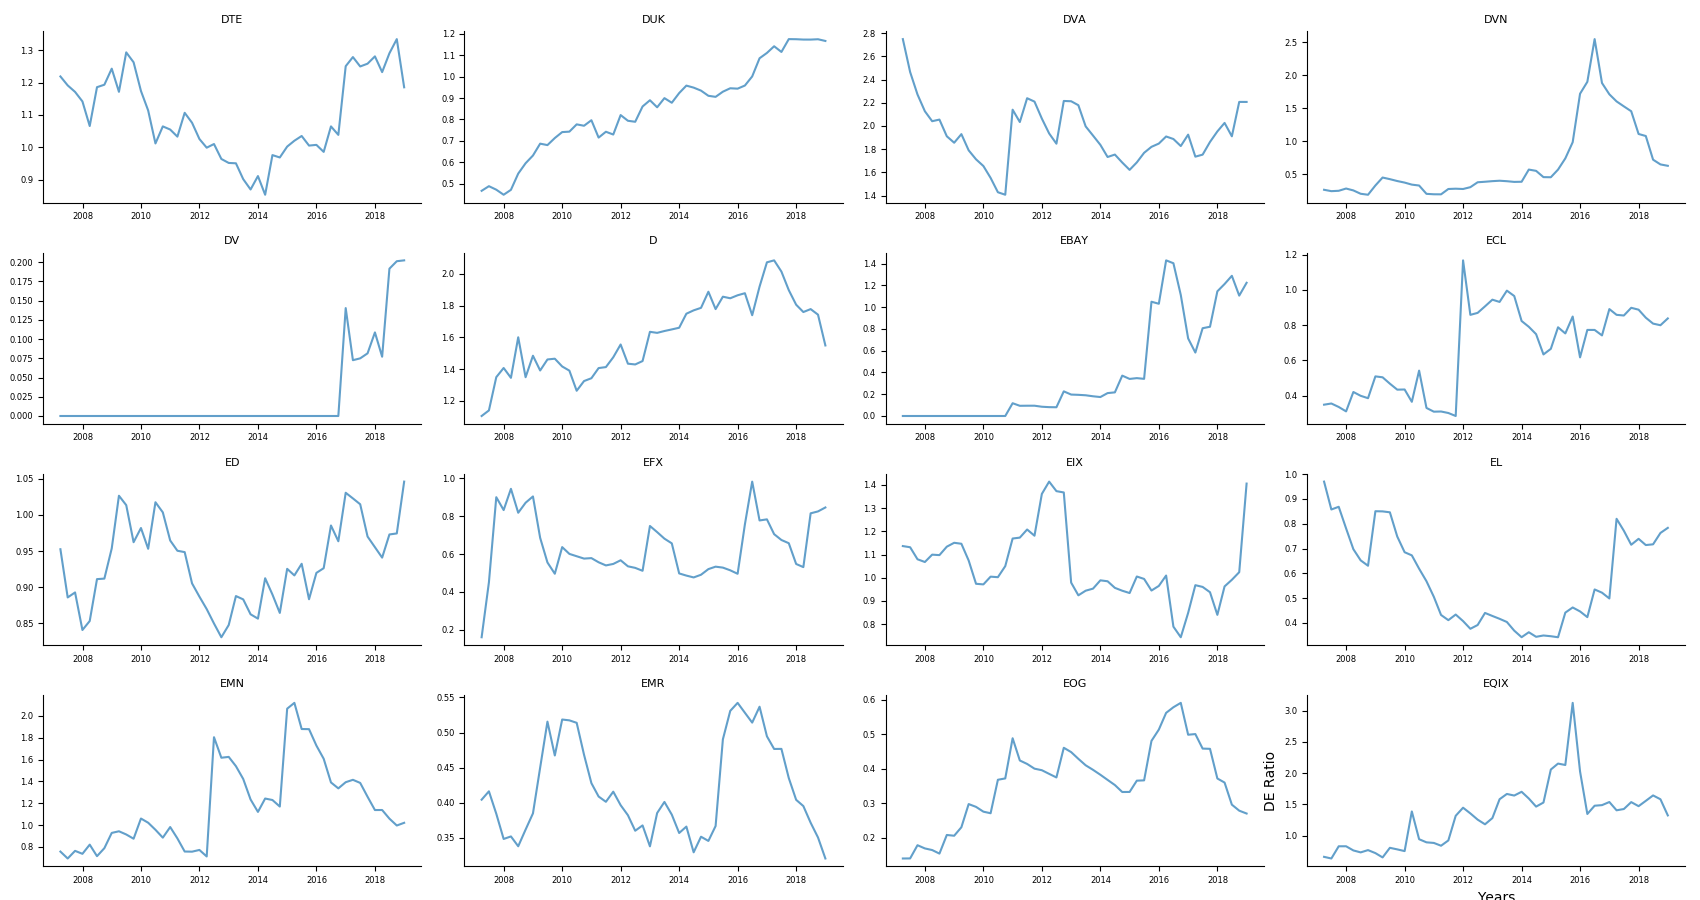









Batch 10


<IPython.core.display.Javascript object>


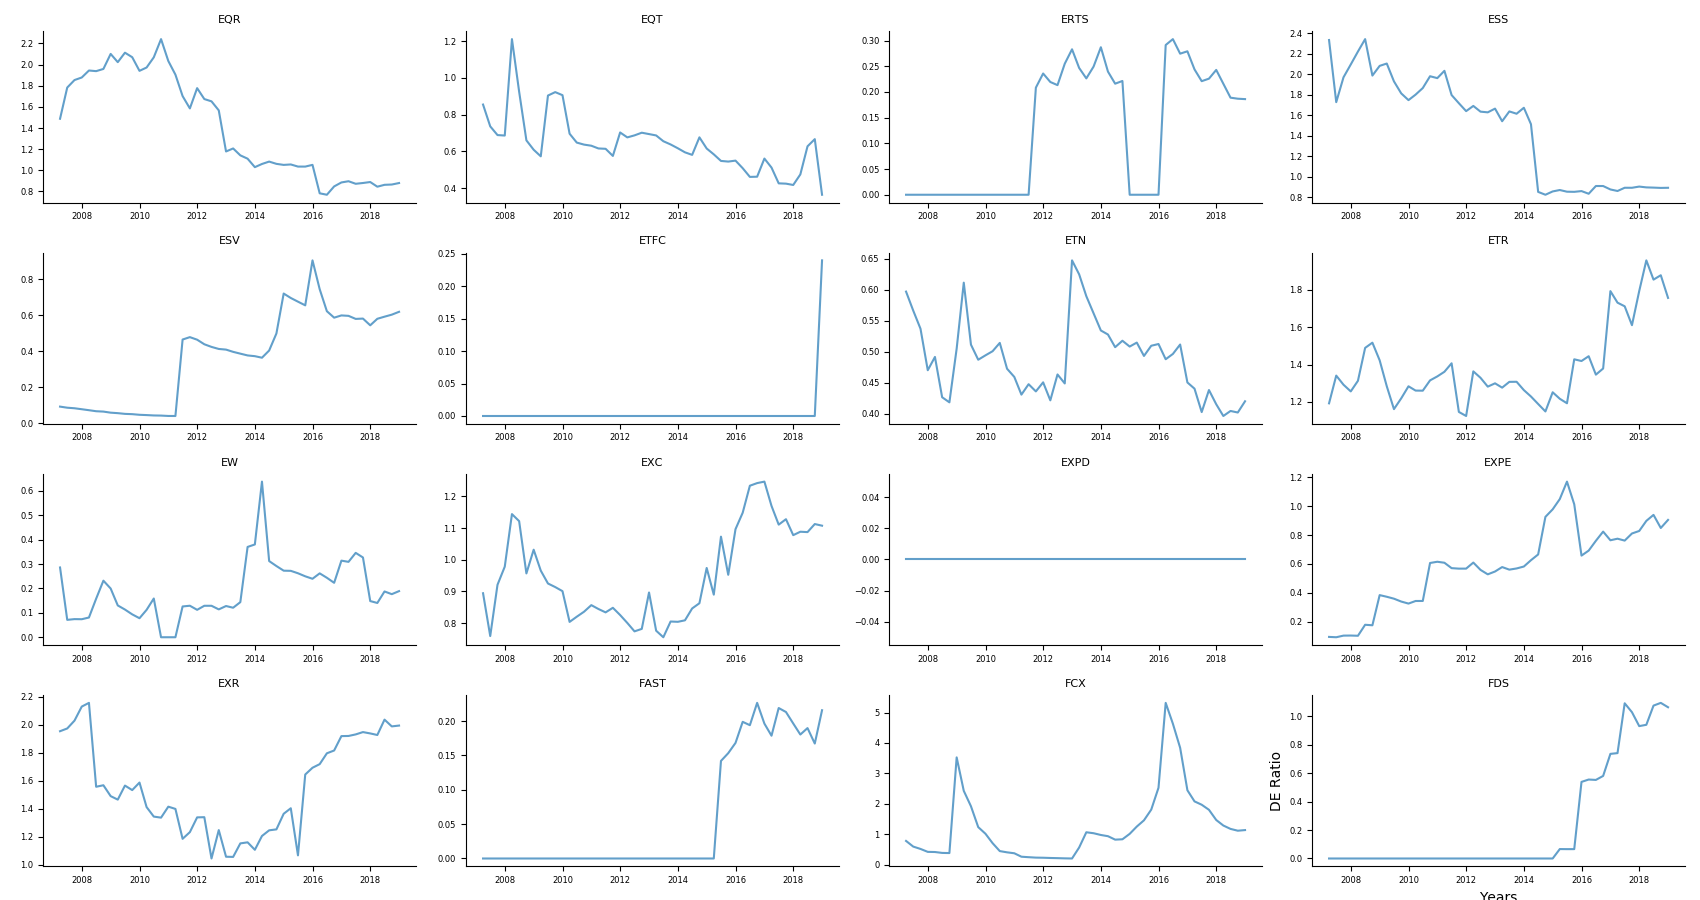









Batch 11


<IPython.core.display.Javascript object>


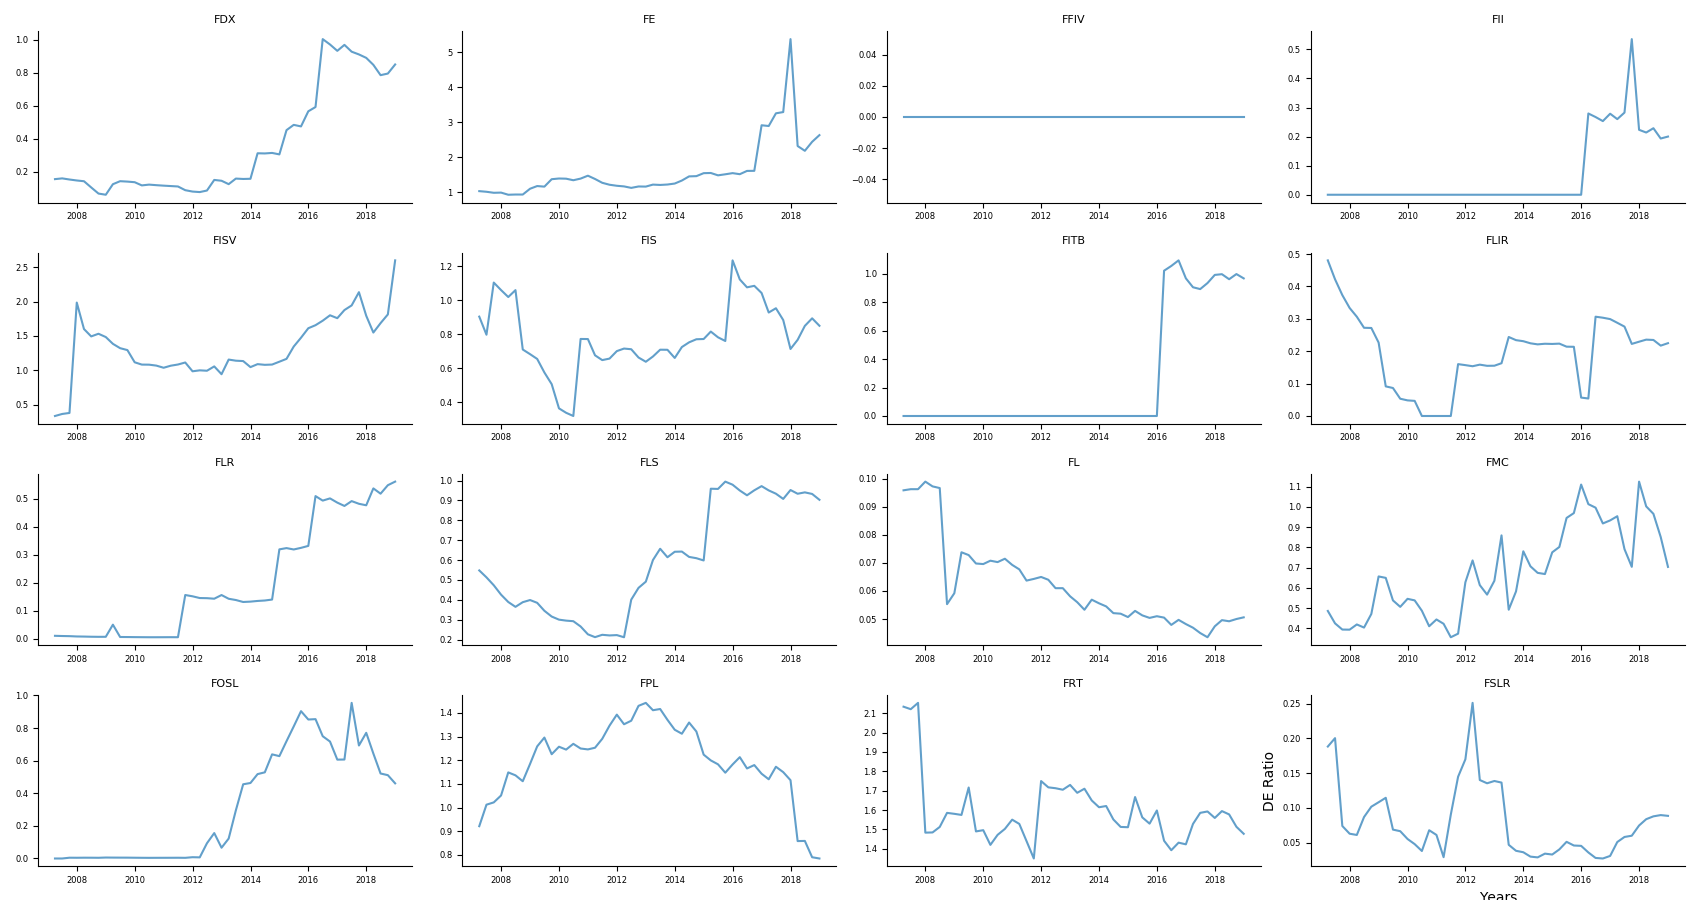









Batch 12


<IPython.core.display.Javascript object>


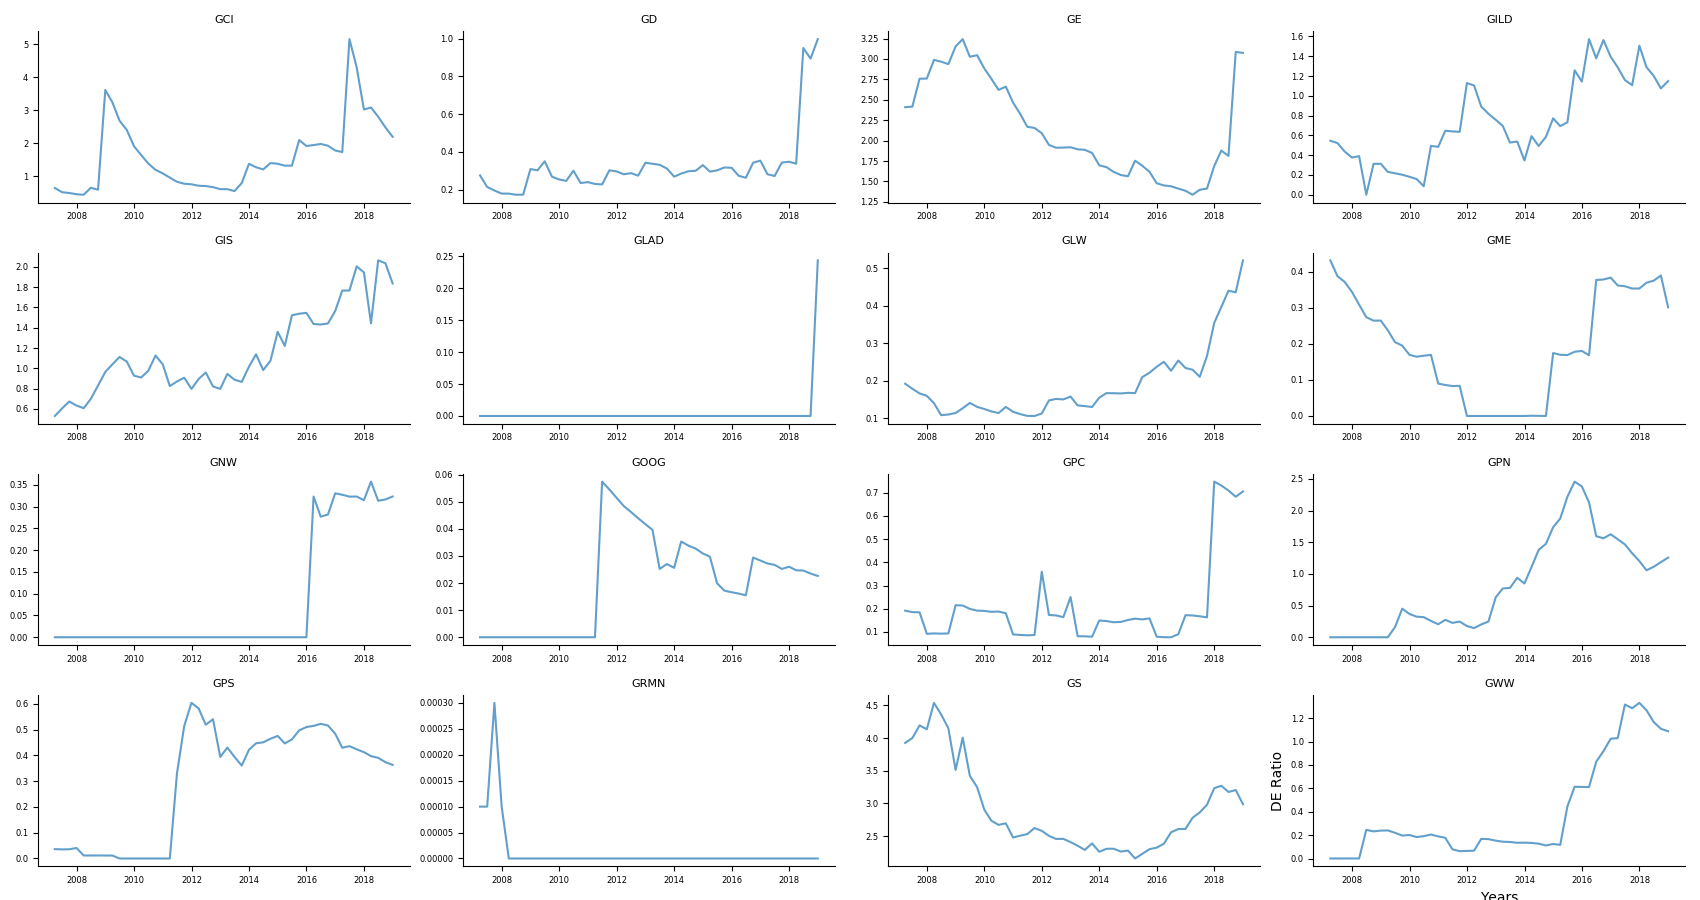









Batch 13


<IPython.core.display.Javascript object>


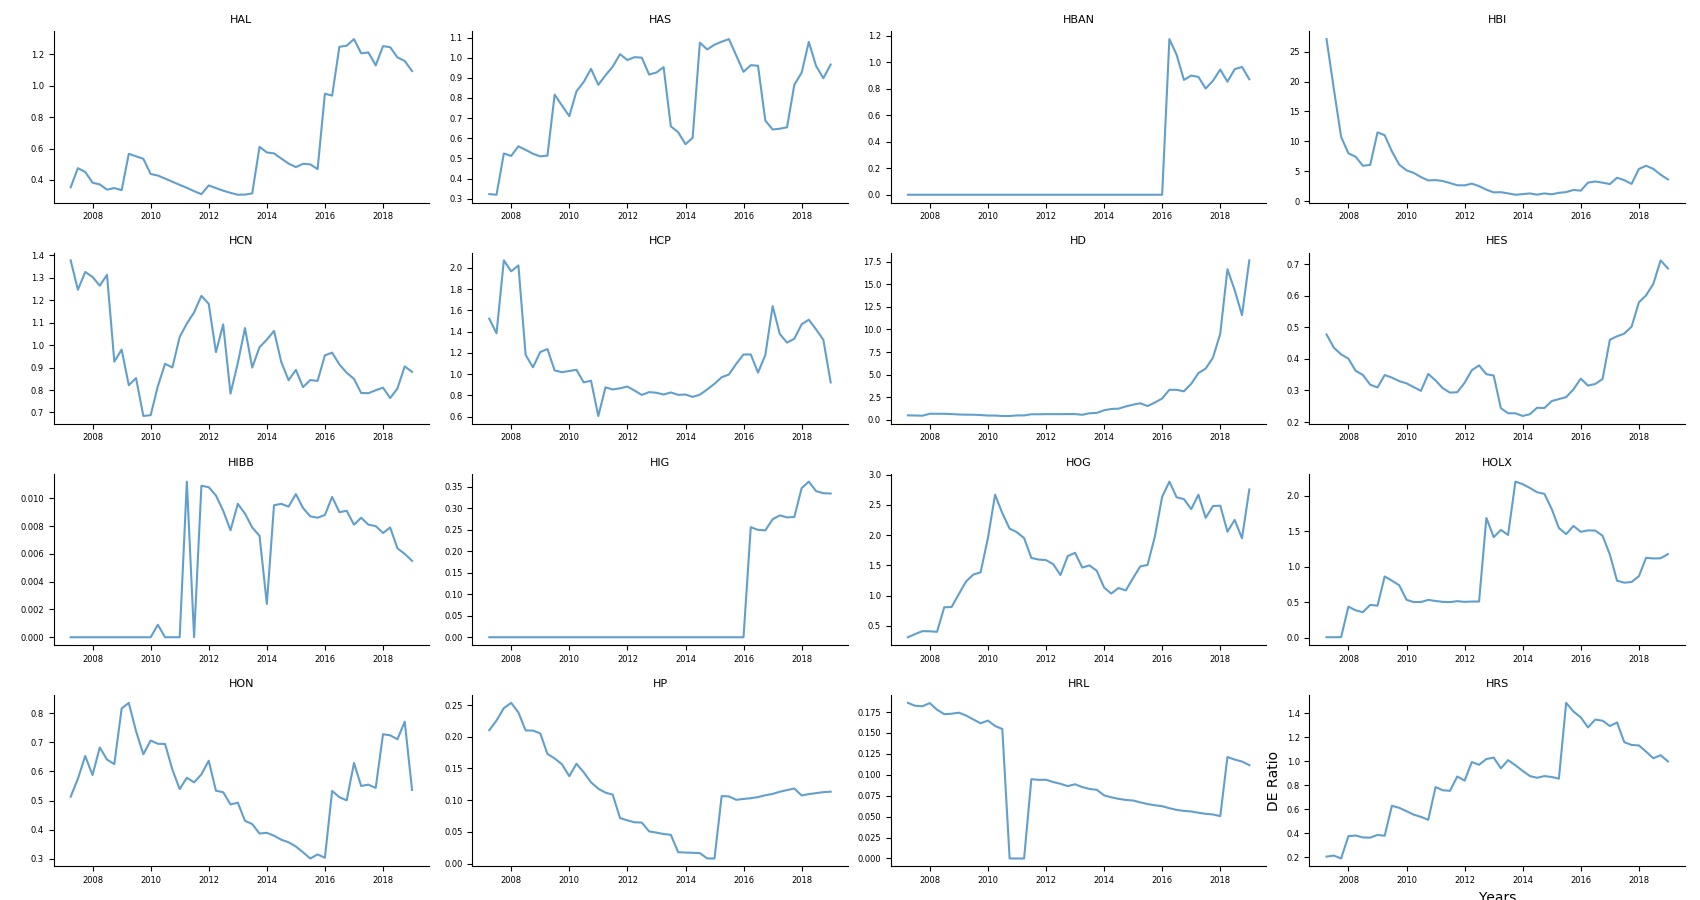









Batch 14


<IPython.core.display.Javascript object>


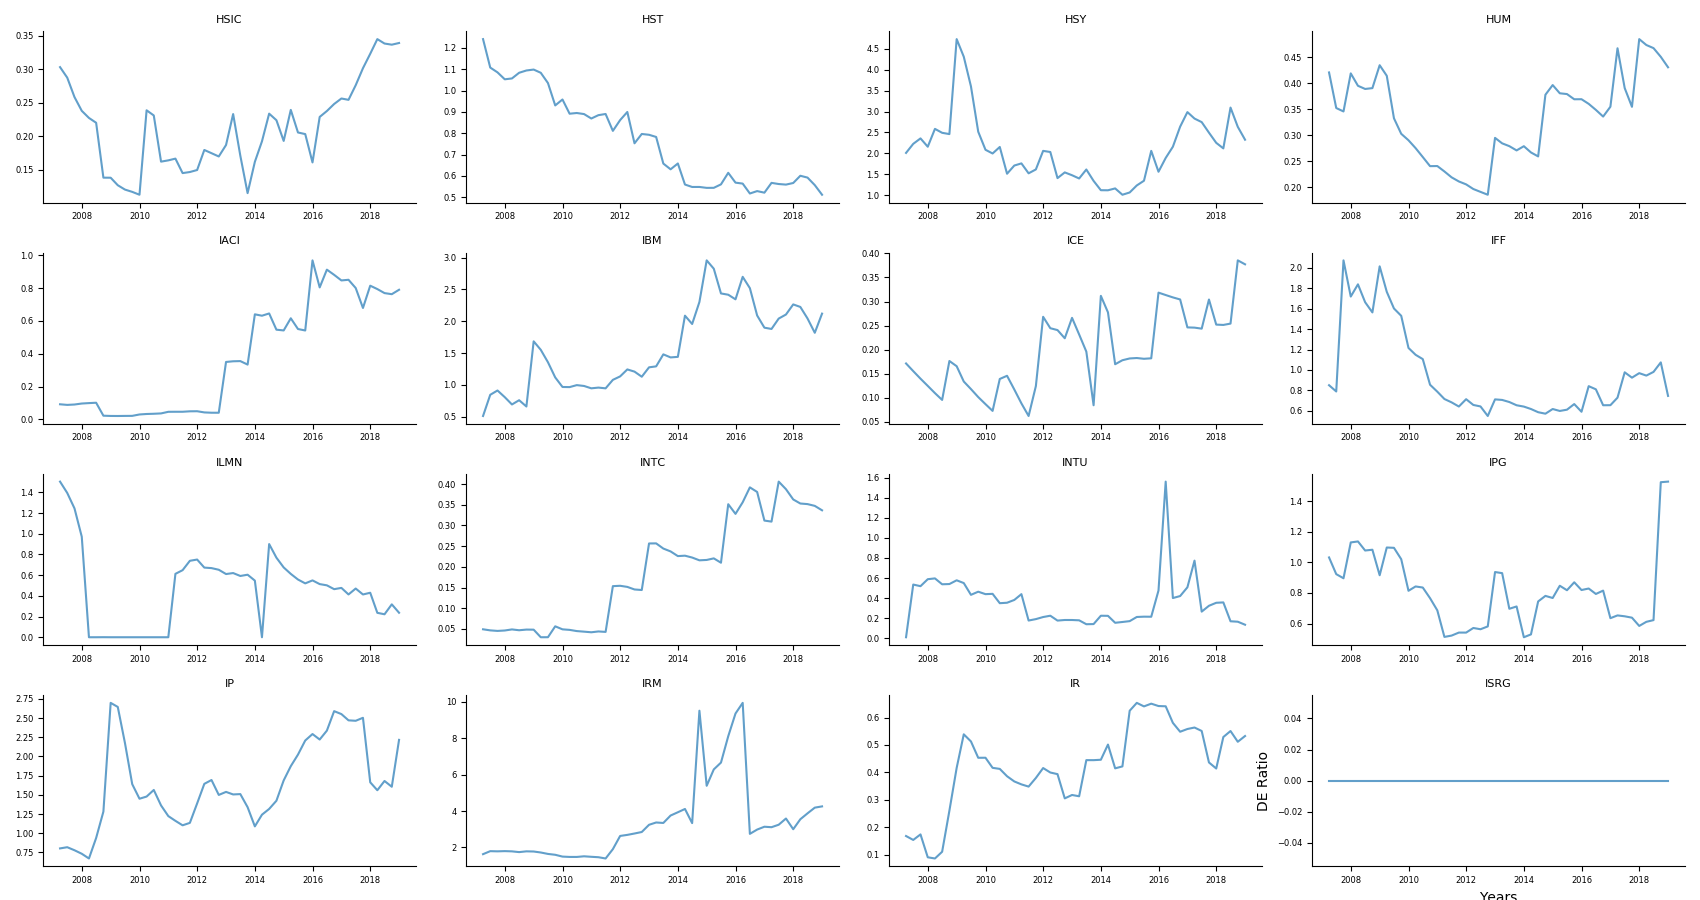









Batch 15


<IPython.core.display.Javascript object>


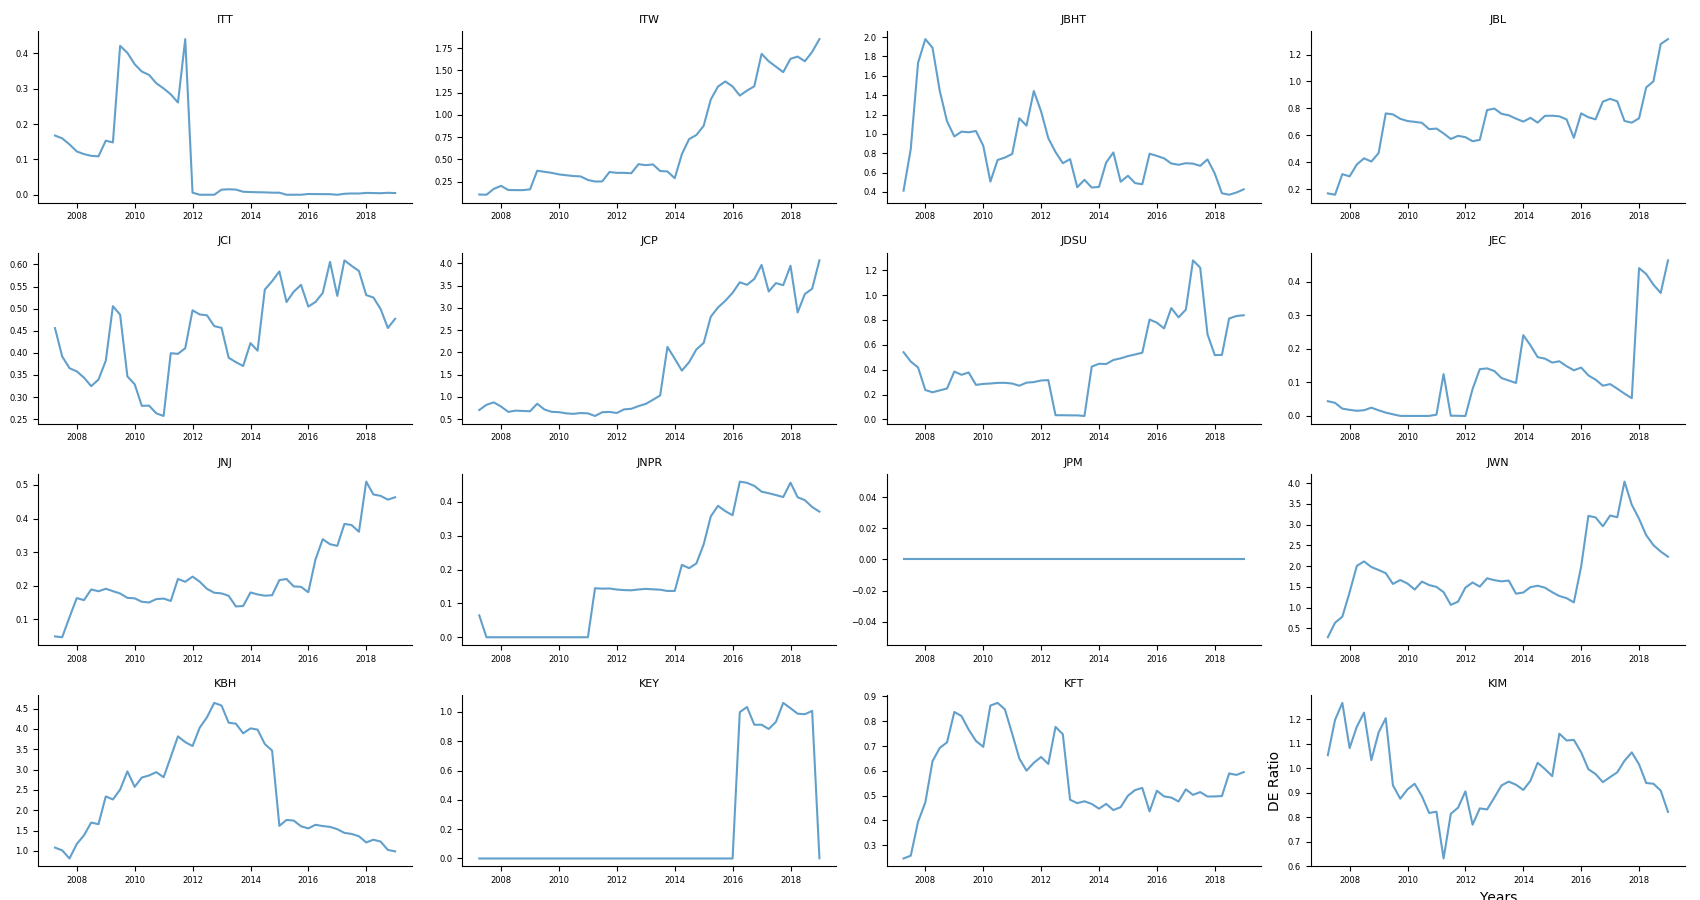









Batch 16


<IPython.core.display.Javascript object>


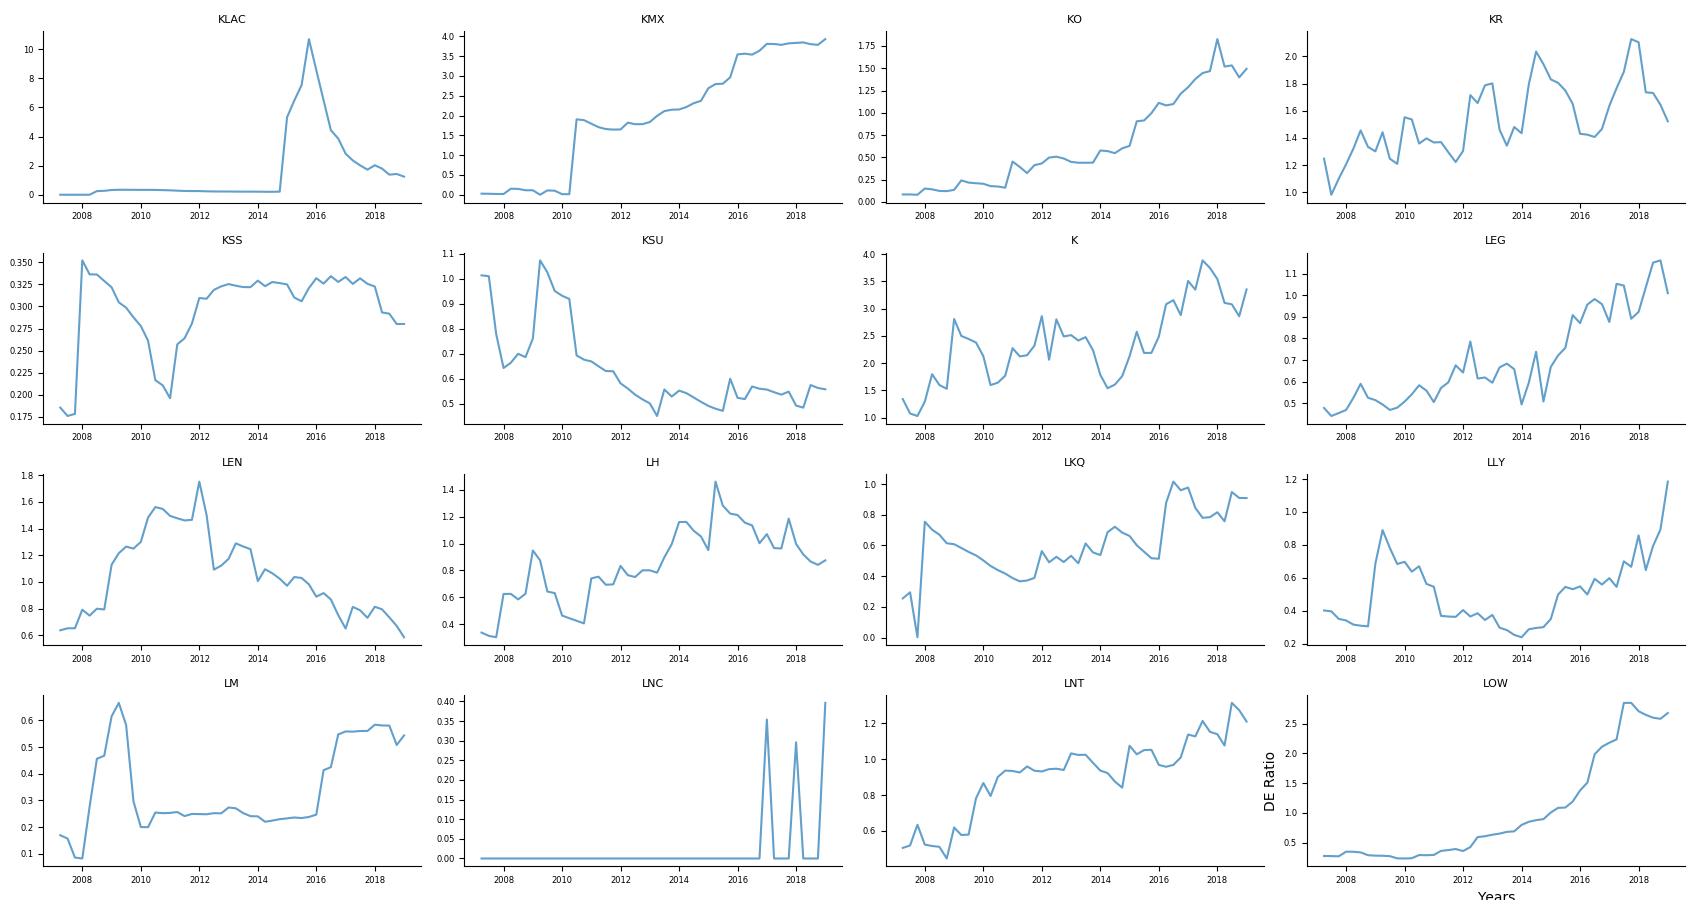









Batch 17


<IPython.core.display.Javascript object>


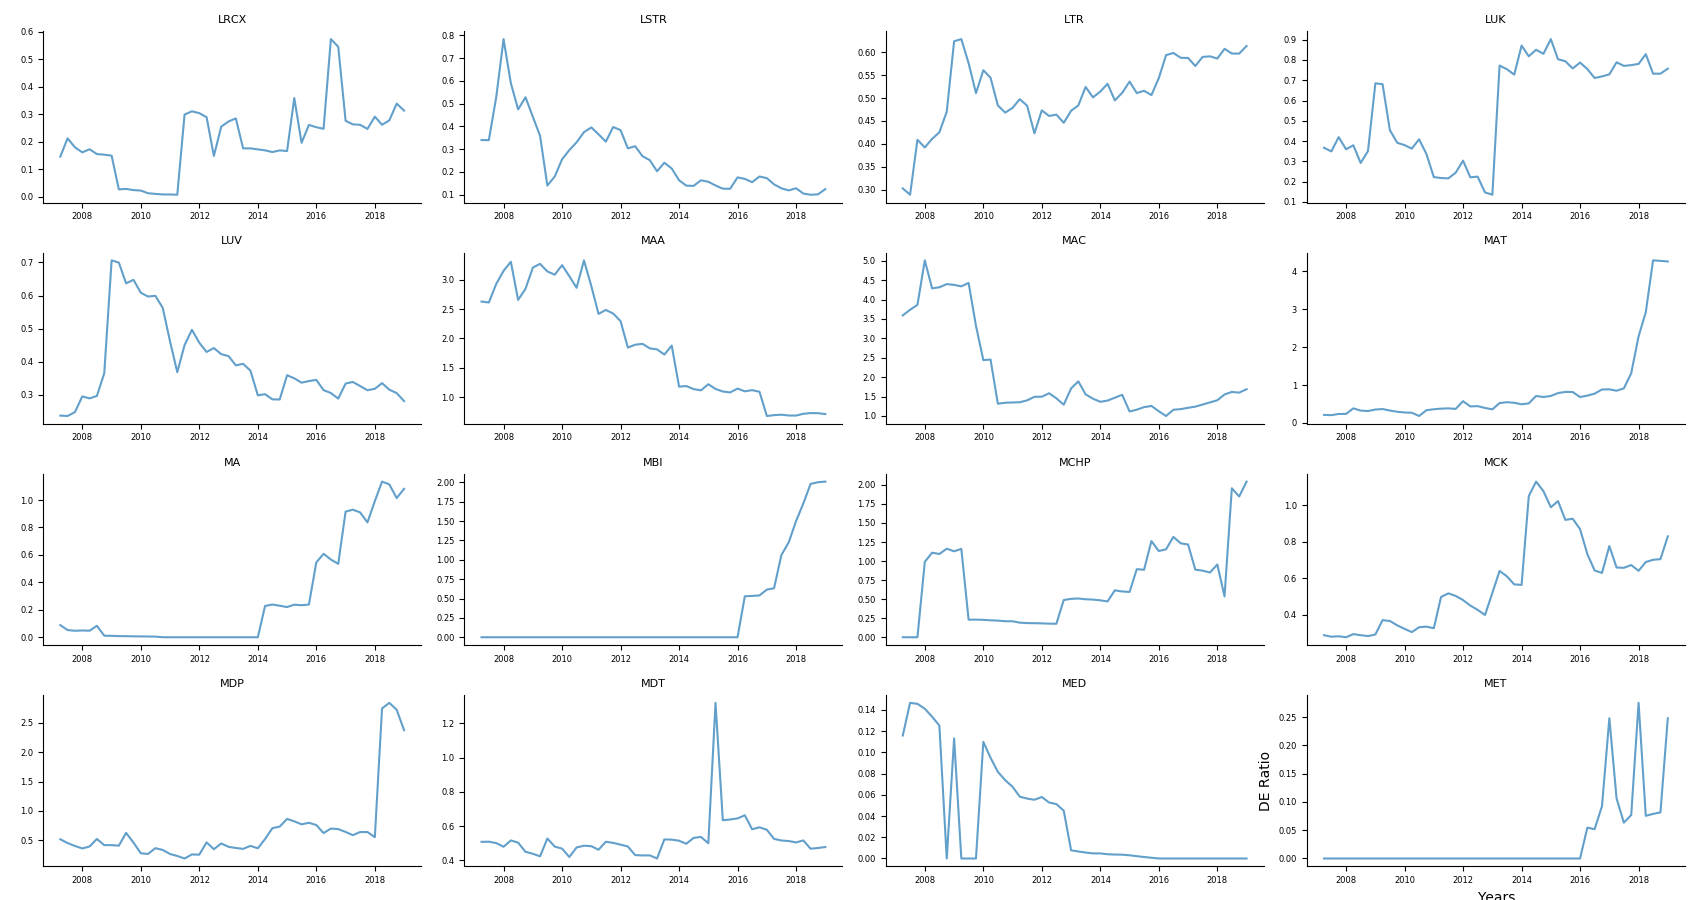









Batch 18


<IPython.core.display.Javascript object>


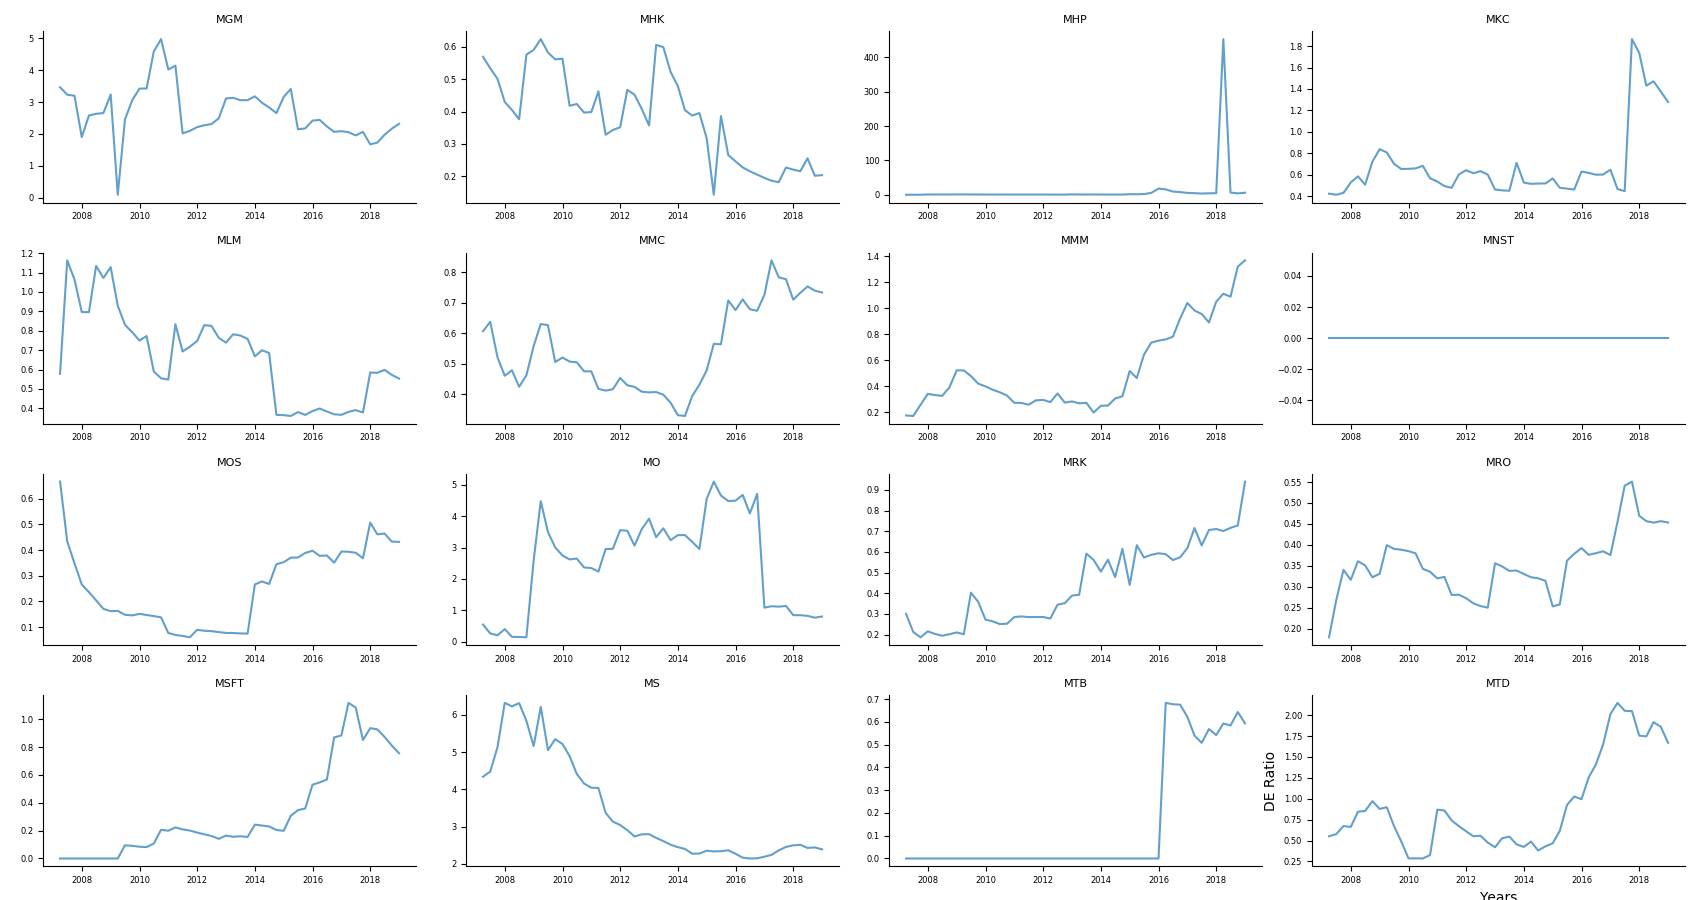









Batch 19


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


<IPython.core.display.Javascript object>


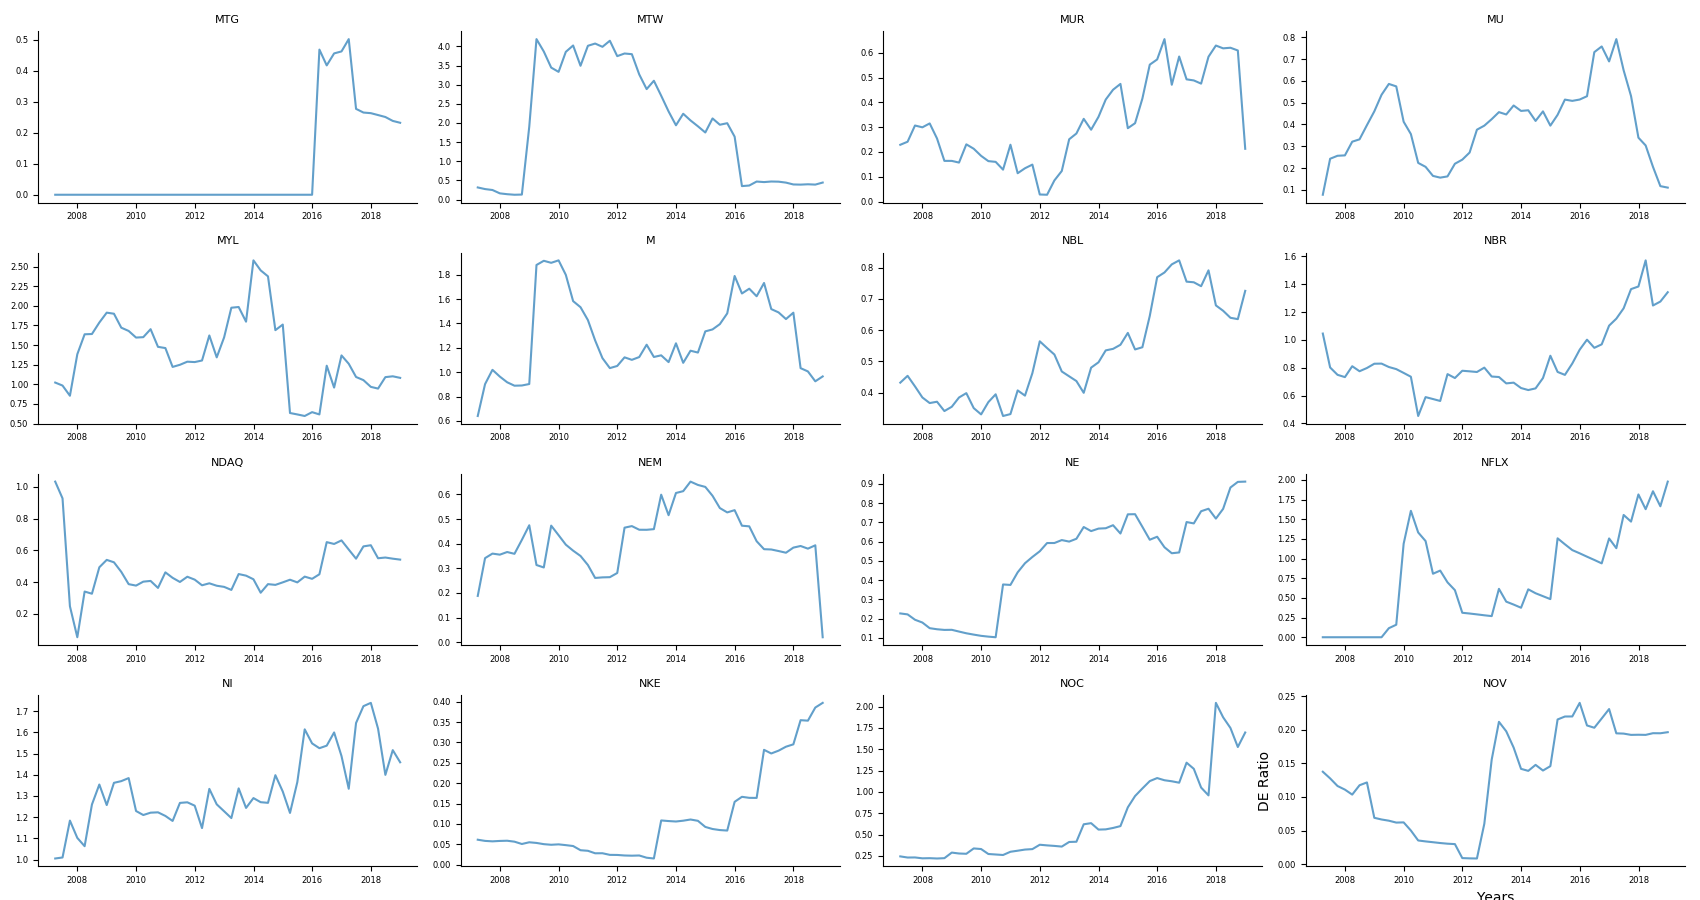









Batch 20


<IPython.core.display.Javascript object>


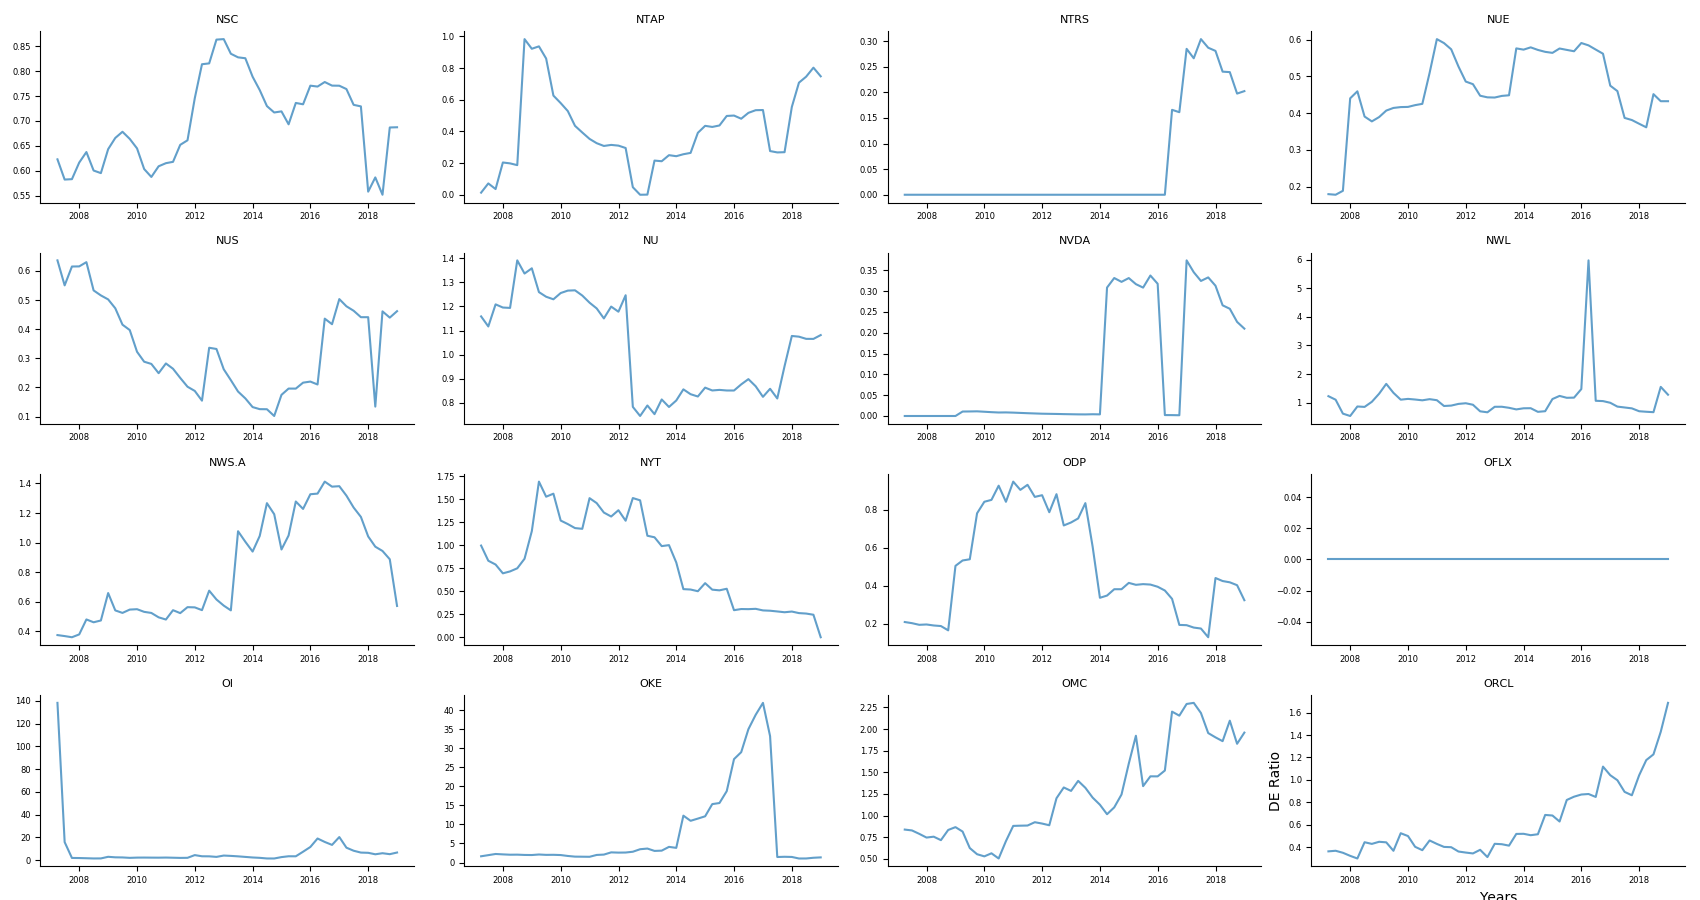









Batch 21


<IPython.core.display.Javascript object>


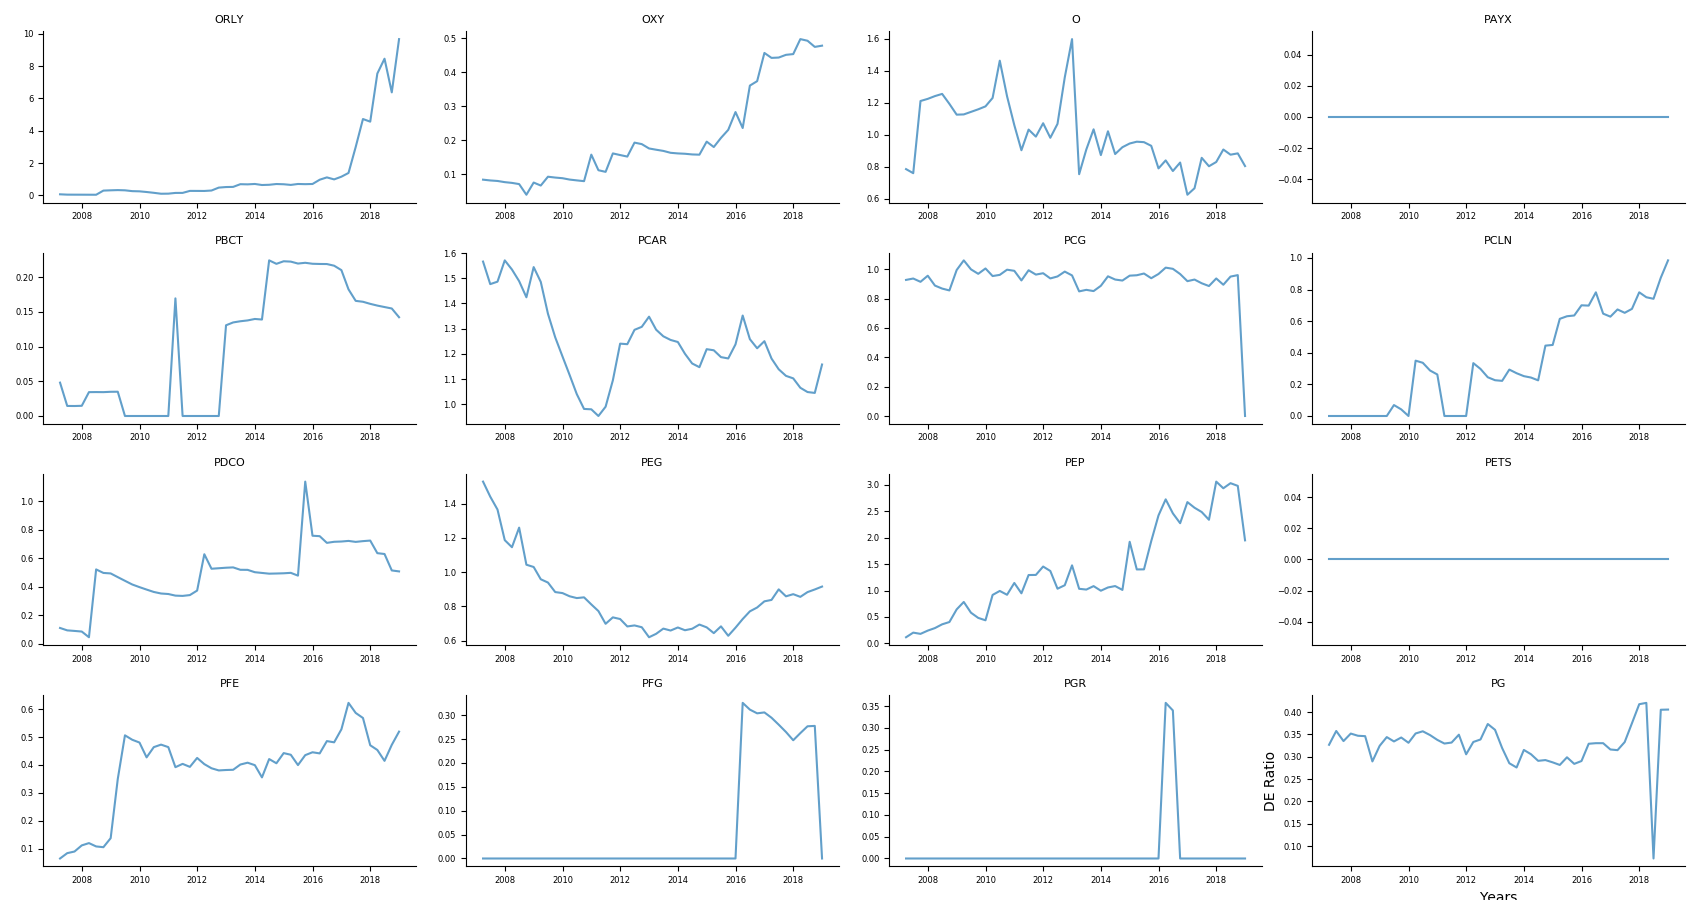









Batch 22


<IPython.core.display.Javascript object>


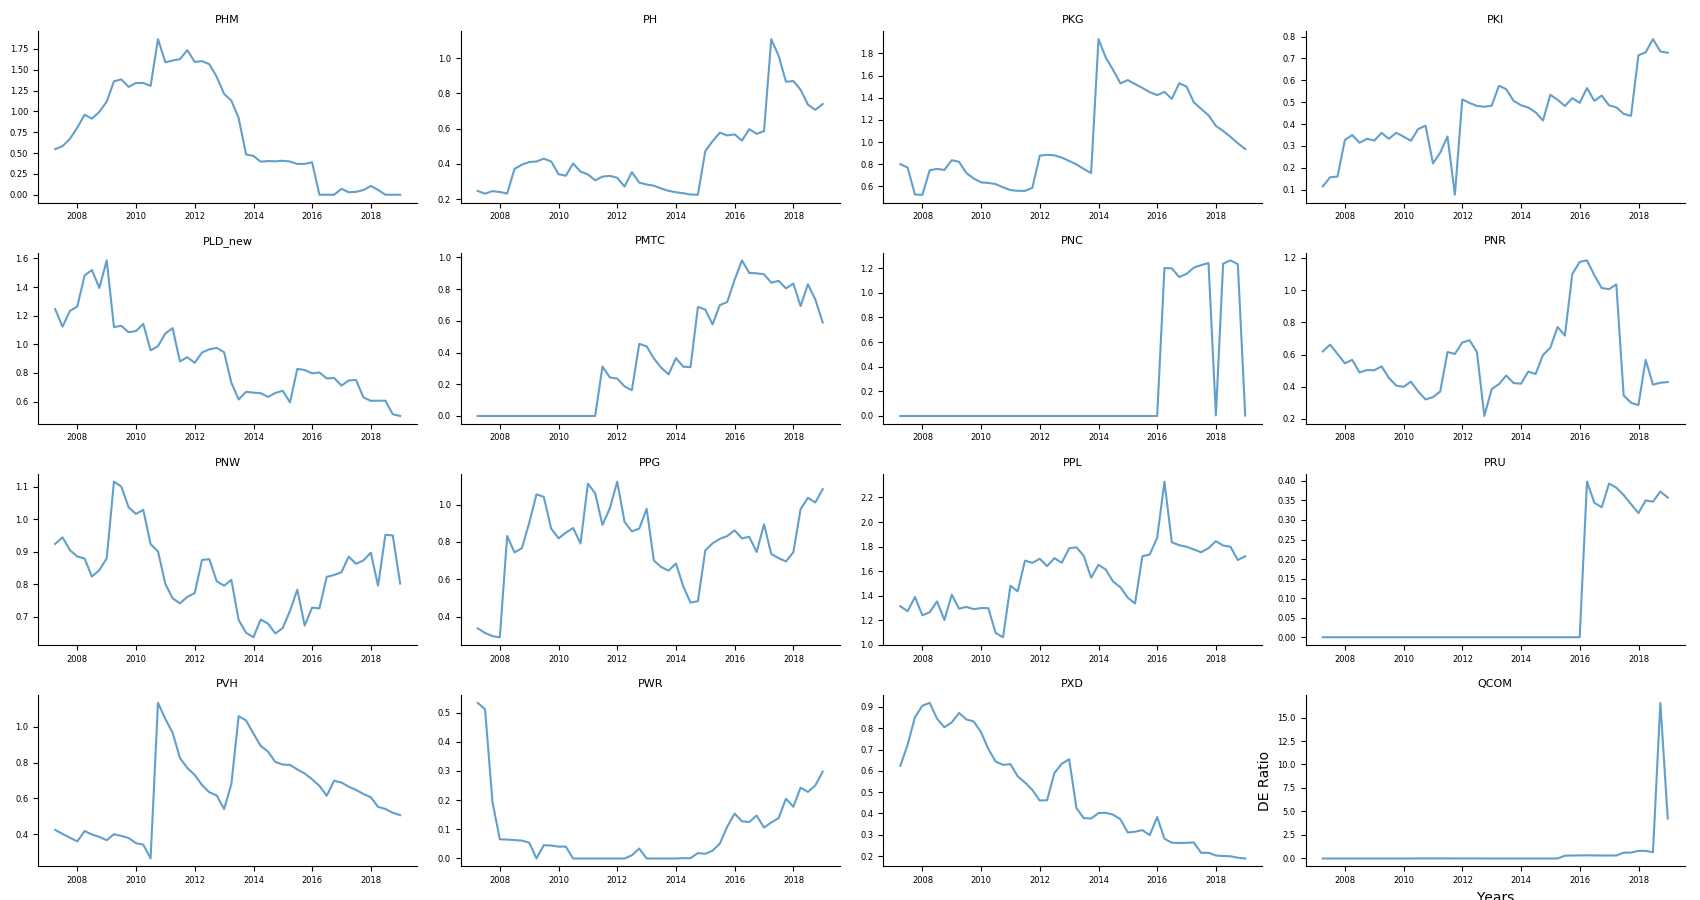









Batch 23


<IPython.core.display.Javascript object>


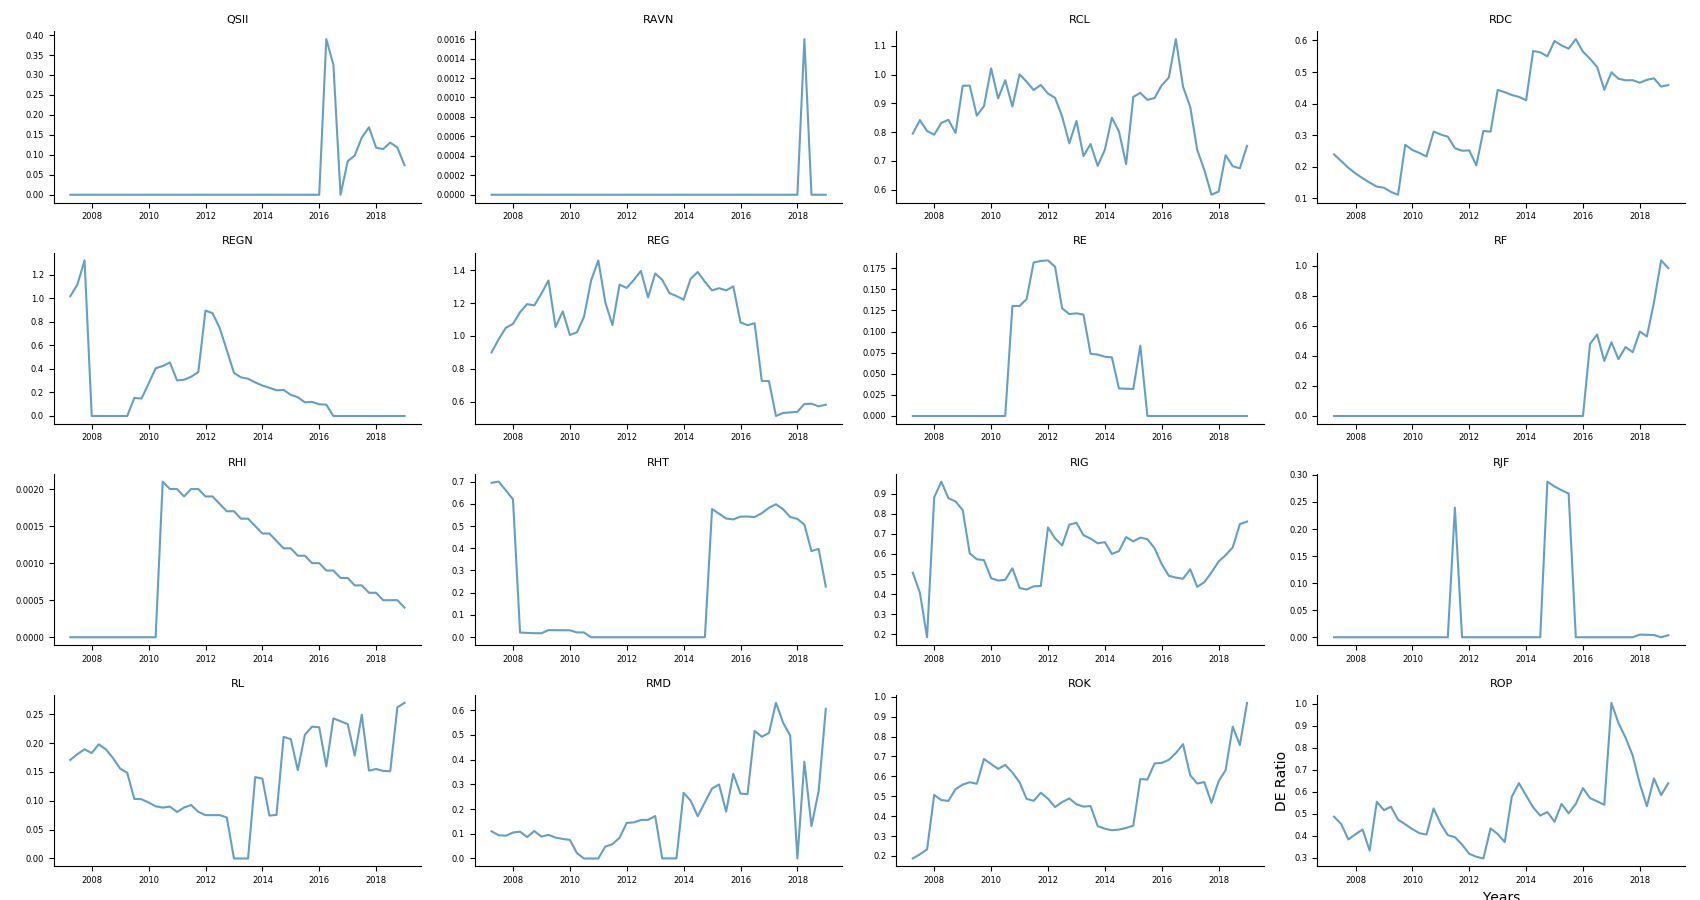









Batch 24


<IPython.core.display.Javascript object>


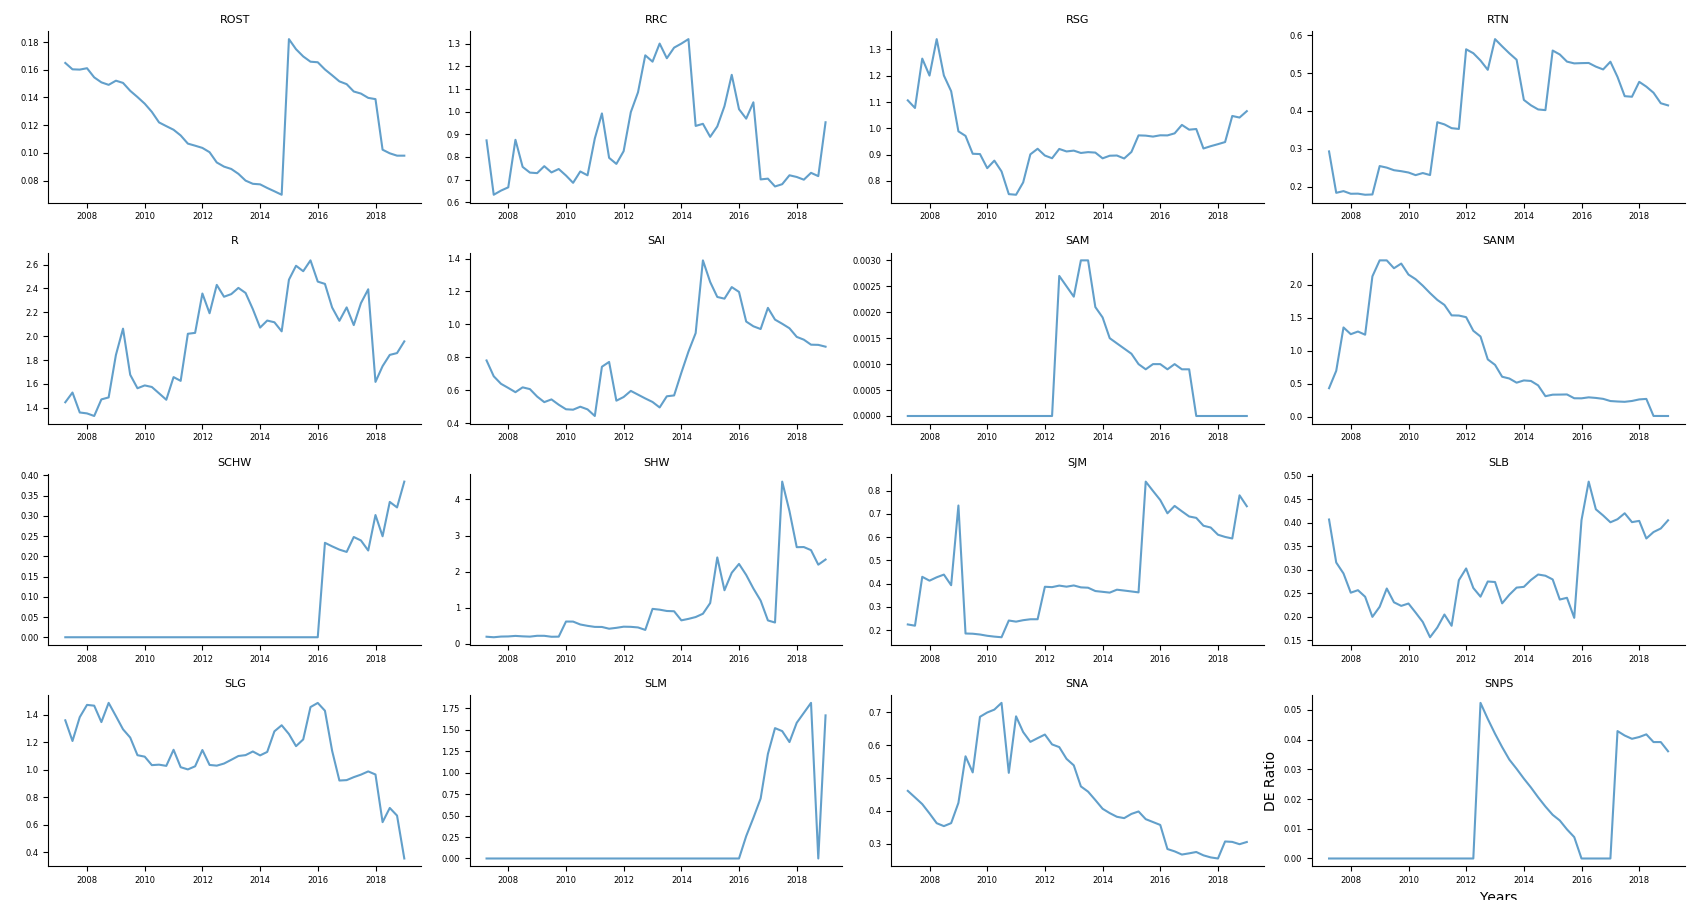









Batch 25


<IPython.core.display.Javascript object>


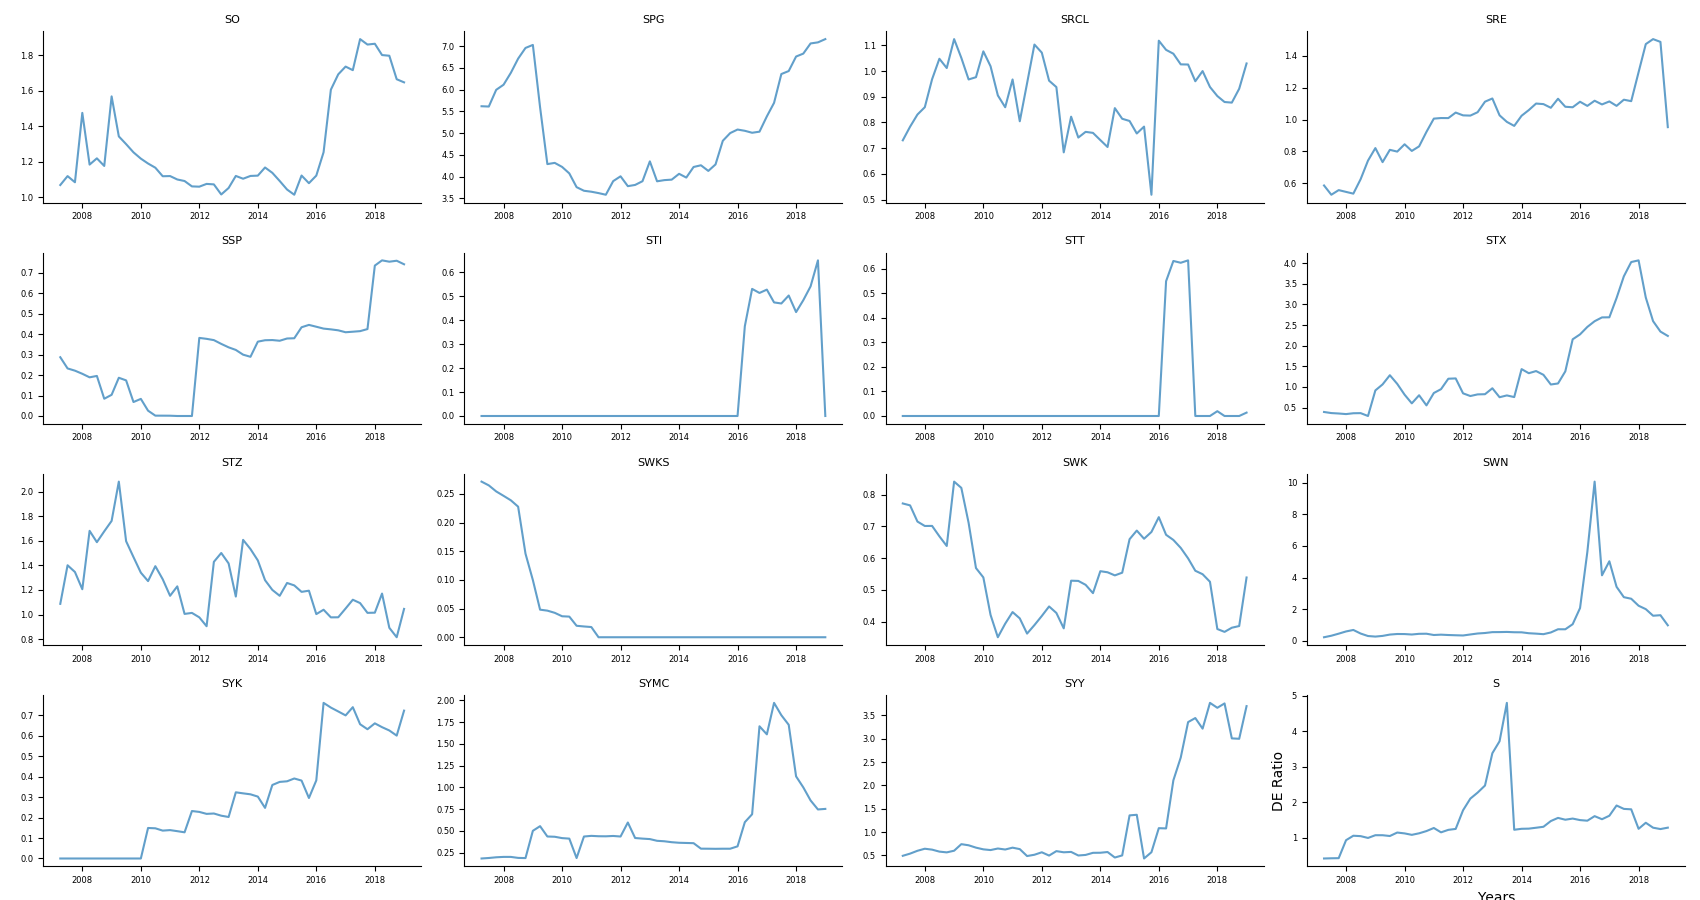









Batch 26


<IPython.core.display.Javascript object>


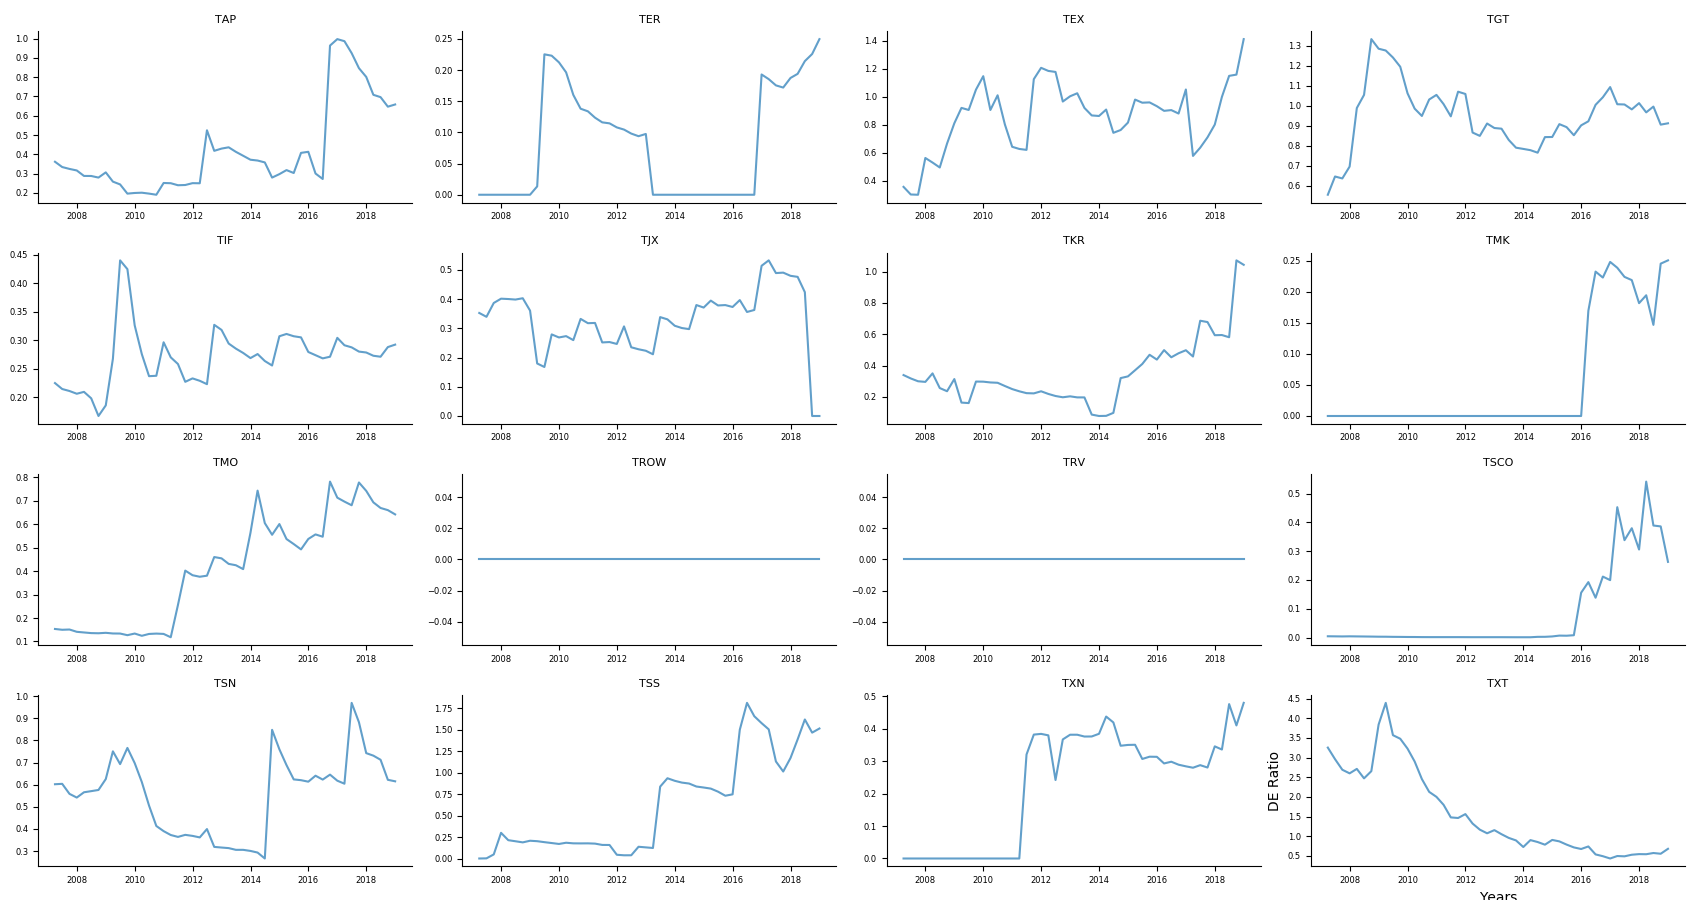









Batch 27


<IPython.core.display.Javascript object>


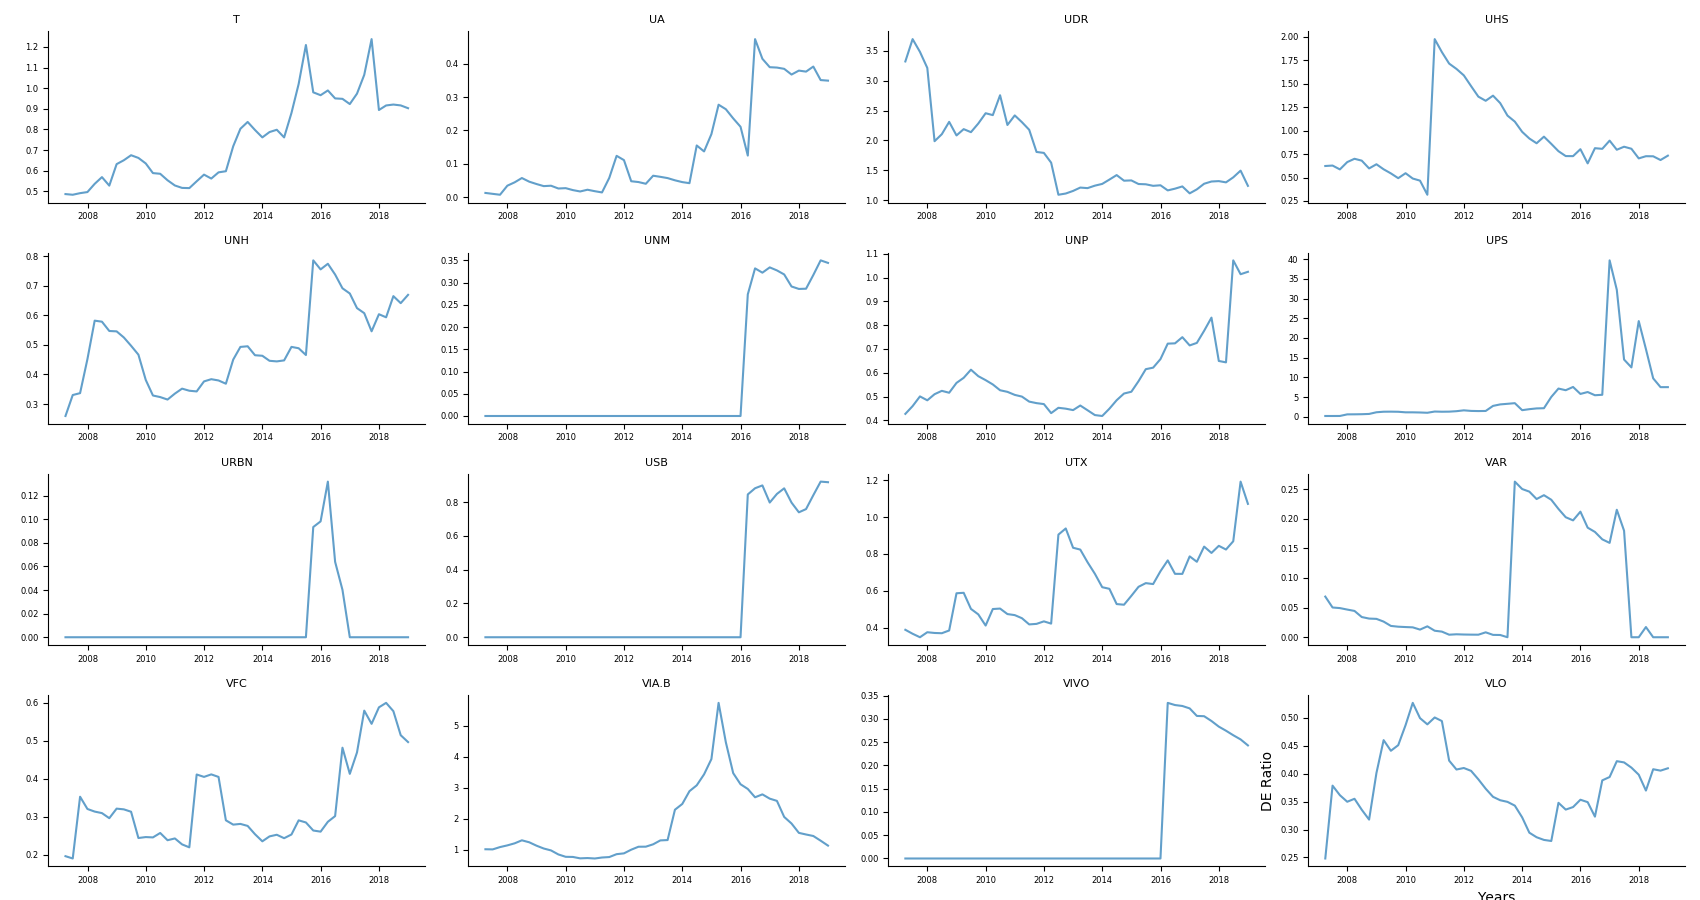









Batch 28


<IPython.core.display.Javascript object>


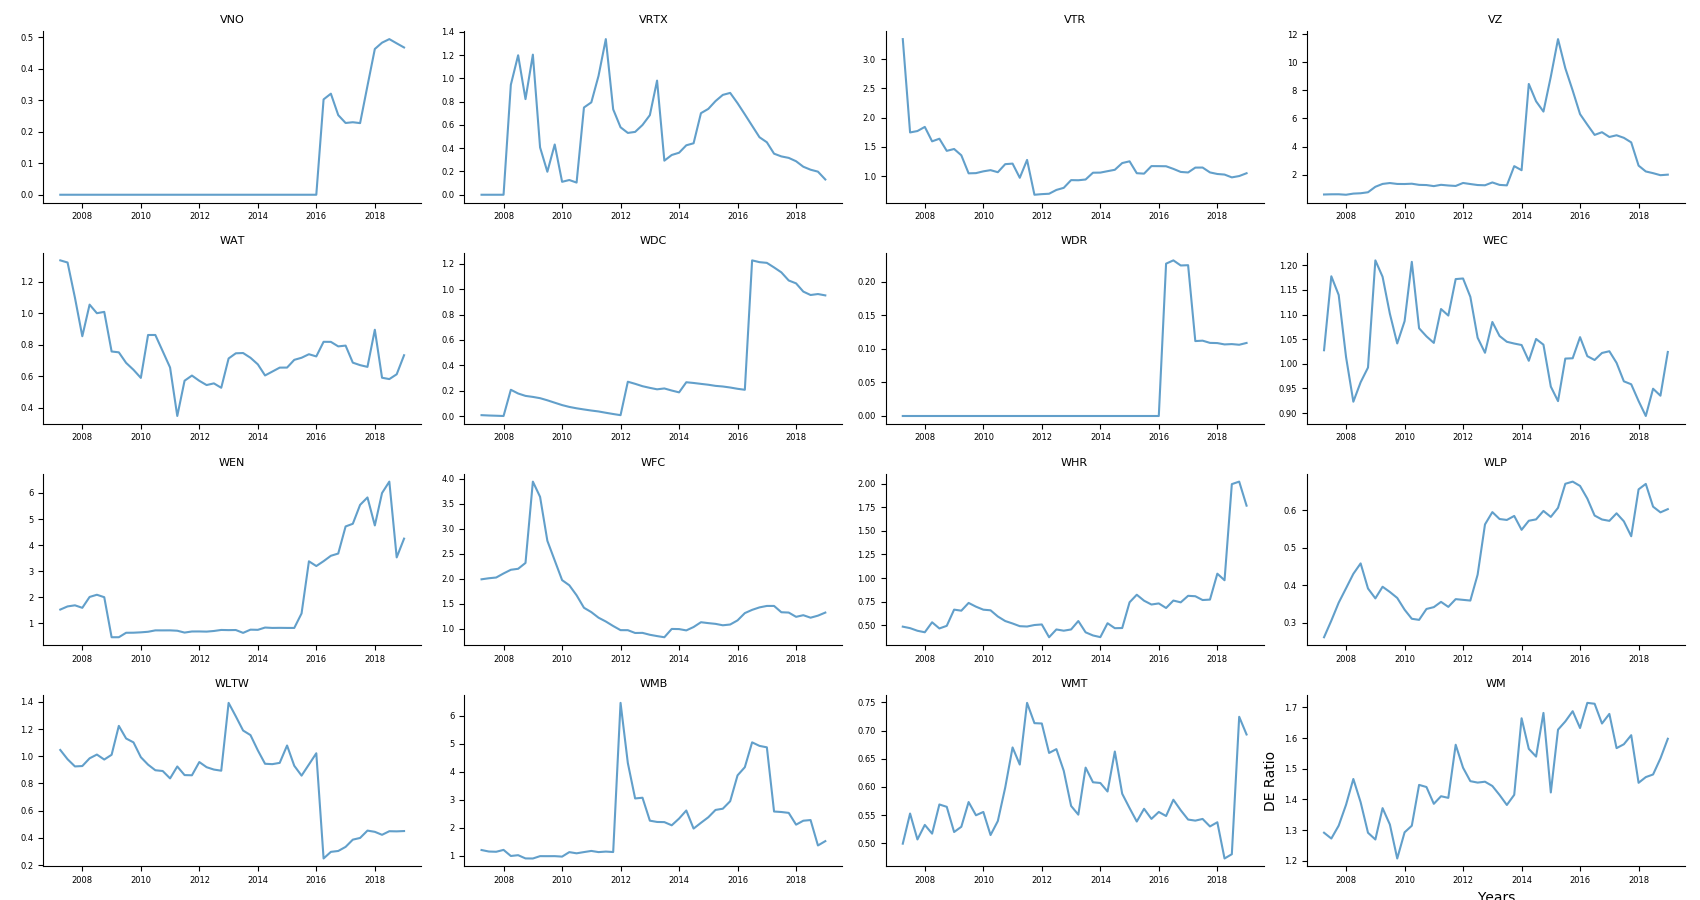

In [42]:
for i in range(nloops):
    nn = len(df.columns)
    lower = i*n_plots
    upper = (i+1)*n_plots
    #print(lower, upper)
    temp_list = df.columns[lower:upper]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    ### legend labels
    dot_labels = ['Price', 'Company', 'Market']
    temp_list_of_axis = []
    
    ### instantiage
    fig, ax = plt.subplots(n_rows,n_cols,figsize=(17,9))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### company prices, worst 5 dates with worst returns
            #temp_worst_prices = worst_days_prices[symbol]
            ### comapny returns, worst 5 systemic dates with worst returns
            #temp_worst_prices_sys = worst_days_sys_prices[symbol]

            ### Company Timeseries            
            wt = ax[k, l].plot(dates, df[symbol].values, label='Quarterly DE ratio'.format(symbol), alpha=0.7)            

            ### PLOT: 5 worst company dates
            #wc = ax[k, l].scatter(temp_worst_prices.index, temp_worst_prices.values, 
            #           color='red', 
            #           linewidths=red_dot, 
            #           edgecolor='red') 
                       #label='Worst Company Trading')
            ### PLOT: Returns on 5 worst systemic dates 
            #wm = ax[k,l].scatter(temp_worst_prices_sys.index, temp_worst_prices_sys.values, 
            #           color='black', 
            #           linewidths=black_dot, 
            #           edgecolor='black') 
                       #label='Worst Market Trading Days')            



            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title(symbol, fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].tick_params(axis="y", labelsize=axis_font)
            #ax[k,l].set_ylim([-0.45, 0.45])            
            #temp_list_of_axis.append([wt, wc, wm])
            temp_list_of_axis.append(wt)
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
    #leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
    #           #title='Worst Trading Days', title_fontsize=25, 
    #           bbox_to_anchor=(1.0, 0.97), 
    #           prop={'size':legend_font})#, fontsize=sup_title_font)
    #leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()
    #plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220) 
        
#             for tick in ax[k, l].get_xticklabels():
#                 tick.set_rotation(20)
#                 tick.

## Leftover Plots (12)

In [70]:
### matrix of subplots
n_cols = 3
n_rows = 4
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

In [71]:
temp_matrix

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])









Batch 0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


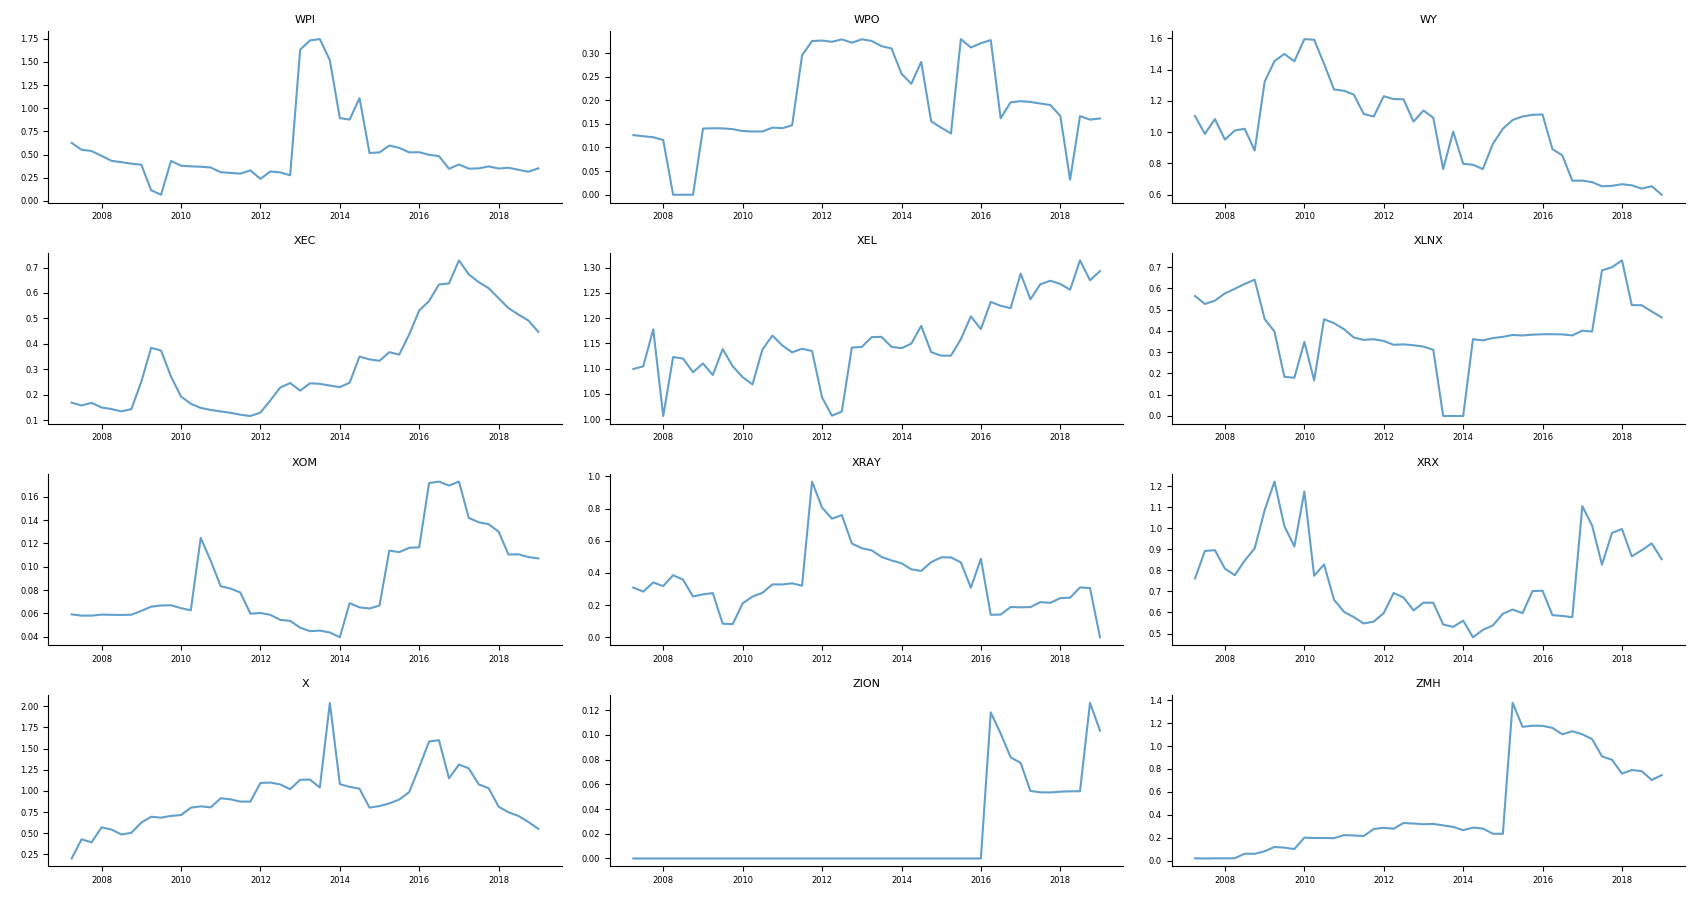

In [73]:
for i in range(nloops):
    nn = len(df.columns)
    #print(lower, upper)
    temp_list = df.columns[-n_plots:]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    dot_labels = ['Price', 'Company', 'Market']
    temp_list_of_axis = []
    
    fig, ax = plt.subplots(n_rows, n_cols,figsize=(17,9))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### company prices, worst 5 dates with worst returns
            #temp_worst_prices = worst_days_prices[symbol]
            ### comapny returns, worst 5 systemic dates with worst returns
            #temp_worst_prices_sys = worst_days_sys_prices[symbol]

            ### Company Timeseries            
            wt = ax[k, l].plot(dates, df[symbol].values, label='Quarterly DE ratio'.format(symbol), alpha=0.7)            

            ### PLOT: 5 worst company dates
            #wc = ax[k, l].scatter(temp_worst_prices.index, temp_worst_prices.values, 
            #           color='red', 
            #           linewidths=red_dot, 
            #           edgecolor='red') 
                       #label='Worst Company Trading')
            ### PLOT: Returns on 5 worst systemic dates 
            #wm = ax[k,l].scatter(temp_worst_prices_sys.index, temp_worst_prices_sys.values, 
            #           color='black', 
            #           linewidths=black_dot, 
            #           edgecolor='black') 
                       #label='Worst Market Trading Days')            



            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title(symbol, fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].tick_params(axis="y", labelsize=axis_font)
            #ax[k,l].set_ylim([-0.45, 0.45])            
            #temp_list_of_axis.append([wt, wc, wm])
            temp_list_of_axis.append(wt)
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
    #leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
    #           #title='Worst Trading Days', title_fontsize=25, 
    #           bbox_to_anchor=(1.0, 0.97), 
    #           prop={'size':legend_font})#, fontsize=sup_title_font)
    #leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()
    #plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220) 
        
#             for tick in ax[k, l].get_xticklabels():
#                 tick.set_rotation(20)
#                 tick.